##Initialization

In [1]:
import os
os.getcwd()

'/content'

Important: in order to mount successfully, please first find the shared folder under "Shared with me" and create a shortcut in your "My Drive".

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
new_path = '/content/drive/My Drive/IBM_Spring24/Factor Research/Collected Data/Global Data'
os.chdir(new_path)

Mounted at /content/drive


In [5]:
# Verify the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content/drive/.shortcut-targets-by-id/1iN60OKiQulG4Spa_MfS5BtAeKTaGKIGa/IBM_Spring24/Factor Research/Collected Data/Global Data


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from itertools import product
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
!pip install openpyxl

## Importing and merging the datasets

Importing the Agricultural Policy Monitoring and Evaluation global data:

In [8]:
Agricultural_Policy_Monitoring_and_Evaluation = pd.read_csv('/content/drive/My Drive/IBM_Spring24/Factor Research/Collected Data/Global Data/Agricultural Policy Monitoring and Evaluation.csv')
print(Agricultural_Policy_Monitoring_and_Evaluation.shape)
Agricultural_Policy_Monitoring_and_Evaluation.head()

(85848, 26)


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,OBS_VALUE,Observation value,DECIMALS,Decimals,OBS_STATUS,Observation status,CURRENCY,Currency,UNIT_MULT,Unit multiplier
0,DATAFLOW,OECD.TAD.ARP:DSD_AGR_POLIND@DF_MONEVA(1.0),Agricultural Policy Monitoring and Evaluation:...,I,COL,Colombia,A,Annual,GSSEHB,Agricultural knowledge transfer,...,NaN,NaN,2,Two,O,Missing value,NaN,NaN,6.0,Millions
1,DATAFLOW,OECD.TAD.ARP:DSD_AGR_POLIND@DF_MONEVA(1.0),Agricultural Policy Monitoring and Evaluation:...,I,COL,Colombia,A,Annual,GSSEHB,Agricultural knowledge transfer,...,NaN,NaN,2,Two,O,Missing value,NaN,NaN,6.0,Millions
2,DATAFLOW,OECD.TAD.ARP:DSD_AGR_POLIND@DF_MONEVA(1.0),Agricultural Policy Monitoring and Evaluation:...,I,COL,Colombia,A,Annual,GSSEHB,Agricultural knowledge transfer,...,NaN,NaN,2,Two,O,Missing value,NaN,NaN,6.0,Millions
3,DATAFLOW,OECD.TAD.ARP:DSD_AGR_POLIND@DF_MONEVA(1.0),Agricultural Policy Monitoring and Evaluation:...,I,COL,Colombia,A,Annual,GSSEHB,Agricultural knowledge transfer,...,NaN,NaN,2,Two,O,Missing value,NaN,NaN,6.0,Millions
4,DATAFLOW,OECD.TAD.ARP:DSD_AGR_POLIND@DF_MONEVA(1.0),Agricultural Policy Monitoring and Evaluation:...,I,COL,Colombia,A,Annual,GSSEHB,Agricultural knowledge transfer,...,NaN,NaN,2,Two,O,Missing value,NaN,NaN,6.0,Millions


Importing the Characteristics of producer policy support global data:

In [9]:
Characteristics_of_producer_policy_support = pd.read_csv('/content/drive/My Drive/IBM_Spring24/Factor Research/Collected Data/Global Data/Characteristics of producer policy support.csv')
print(Characteristics_of_producer_policy_support.shape)
Characteristics_of_producer_policy_support.head()

(2146, 26)


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,OBS_VALUE,Observation value,DECIMALS,Decimals,OBS_STATUS,Observation status,CURRENCY,Currency,UNIT_MULT,Unit multiplier
0,DATAFLOW,OECD.TAD.ARP:DSD_AGR_POLIND@DF_POL(1.0),Characteristics of producer policy support,I,CAN,Canada,A,Annual,BP_OPWLSH,"Support with output and payment limits, relati...",...,29.3757,NaN,2,Two,NaN,NaN,NaN,NaN,NaN,NaN
1,DATAFLOW,OECD.TAD.ARP:DSD_AGR_POLIND@DF_POL(1.0),Characteristics of producer policy support,I,CAN,Canada,A,Annual,BP_OPWLSH,"Support with output and payment limits, relati...",...,38.1072,NaN,2,Two,NaN,NaN,NaN,NaN,NaN,NaN
2,DATAFLOW,OECD.TAD.ARP:DSD_AGR_POLIND@DF_POL(1.0),Characteristics of producer policy support,I,CAN,Canada,A,Annual,BP_OPWLSH,"Support with output and payment limits, relati...",...,43.5461,NaN,2,Two,NaN,NaN,NaN,NaN,NaN,NaN
3,DATAFLOW,OECD.TAD.ARP:DSD_AGR_POLIND@DF_POL(1.0),Characteristics of producer policy support,I,CAN,Canada,A,Annual,BP_OPWLSH,"Support with output and payment limits, relati...",...,39.7357,NaN,2,Two,NaN,NaN,NaN,NaN,NaN,NaN
4,DATAFLOW,OECD.TAD.ARP:DSD_AGR_POLIND@DF_POL(1.0),Characteristics of producer policy support,I,CAN,Canada,A,Annual,BP_OPWLSH,"Support with output and payment limits, relati...",...,33.4909,NaN,2,Two,NaN,NaN,NaN,NaN,NaN,NaN


Keeping only the columns we need for now, which are the area, the variable, the time (year), and the values:

In [10]:
columns_to_keep = ['Reference area', 'Measure', 'TIME_PERIOD', 'OBS_VALUE']
Agricultural_Policy_Monitoring_and_Evaluation = Agricultural_Policy_Monitoring_and_Evaluation[columns_to_keep]
Characteristics_of_producer_policy_support = Characteristics_of_producer_policy_support[columns_to_keep]

Renaming both dataset so that they have consistent column names and we can concatenate them:

In [11]:
# Renaming columns
Agricultural_Policy_Monitoring_and_Evaluation.rename(
    columns={
        'Reference area': 'Area',
        'Measure': 'Variable',
        'TIME_PERIOD': 'Year',
        'OBS_VALUE': 'Value'
    },
    inplace=True
)

Characteristics_of_producer_policy_support.rename(
    columns={
        'Reference area': 'Area',
        'Measure': 'Variable',
        'TIME_PERIOD': 'Year',
        'OBS_VALUE': 'Value'
    },
    inplace=True
)

In [12]:
print(Agricultural_Policy_Monitoring_and_Evaluation.shape)
Agricultural_Policy_Monitoring_and_Evaluation.head()

(85848, 4)


,Area,Variable,Year,Value
0,Colombia,Agricultural knowledge transfer,1986,NaN
1,Colombia,Agricultural knowledge transfer,1987,NaN
2,Colombia,Agricultural knowledge transfer,1988,NaN
3,Colombia,Agricultural knowledge transfer,1989,NaN
4,Colombia,Agricultural knowledge transfer,1990,NaN


In [13]:
print(Characteristics_of_producer_policy_support.shape)
Characteristics_of_producer_policy_support.head()

(2146, 4)


,Area,Variable,Year,Value
0,Canada,"Support with output and payment limits, relati...",1986,29.3757
1,Canada,"Support with output and payment limits, relati...",1987,38.1072
2,Canada,"Support with output and payment limits, relati...",1988,43.5461
3,Canada,"Support with output and payment limits, relati...",1989,39.7357
4,Canada,"Support with output and payment limits, relati...",1990,33.4909


Concatenating the 2 dataframes:

In [14]:
concatenated_Agri_Char = pd.concat([Agricultural_Policy_Monitoring_and_Evaluation, Characteristics_of_producer_policy_support], ignore_index=True)

# Verify the concatenation
print(concatenated_Agri_Char.shape)
print(concatenated_Agri_Char.head())

(87994, 4)
       Area                         Variable  Year  Value
0  Colombia  Agricultural knowledge transfer  1986    NaN
1  Colombia  Agricultural knowledge transfer  1987    NaN
2  Colombia  Agricultural knowledge transfer  1988    NaN
3  Colombia  Agricultural knowledge transfer  1989    NaN
4  Colombia  Agricultural knowledge transfer  1990    NaN


Since we want the final structure of the data to be a panel data in which we have a column for each year, let's first take a look how would this resulting data look like by pivoting it. Note that we are just taking a look here, and the actual pivoting won't be performed before we finish concatenating all the data since merging pivot table is much more complicated than concatenating data.

In [15]:
pivoted_Agri_Char = concatenated_Agri_Char.pivot_table(
    index=['Area', 'Variable'],
    columns='Year',
    values='Value'
)

# Reset the index to turn the multi-level index into columns
pivoted_Agri_Char.reset_index(inplace=True)

# Display the first few rows to verify the pivot
print(pivoted_Agri_Char.shape)
pivoted_Agri_Char.head()

(2151, 39)


Year,Area,Variable,1986,1987,1988,1989,1990,1991,1992,1993,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Argentina,Agricultural employment,NaN,NaN,NaN,NaN,NaN,14.4,14.2,14.0,...,8.7000,8.6000,8.3000,8.2000,7.9000,7.8000,7.7000,7.7000,7.7000,NaN
1,Argentina,Agricultural knowledge and innovation system,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360.5812,306.6139,344.2329,275.9842,305.3924,209.9039,167.5800,150.1137,119.9353,179.0363
2,Argentina,Agricultural knowledge generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,173.5084,147.7749,163.3528,134.9226,146.7971,104.4526,86.8146,78.3220,66.4397,98.4736
3,Argentina,Agricultural knowledge transfer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187.0728,158.8390,180.8801,141.0615,158.5954,105.4513,80.7655,71.7917,53.4956,80.5627
4,Argentina,Agricultural product safety and inspection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.0030,92.3342,102.5275,61.6801,75.8471,59.7014,53.0971,41.8161,54.9574,67.4327


The first concatenation is done. Now let's move on to cleaning up the next dataset, the Economic_Fitness global data:

In [16]:
Economic_Fitness = pd.read_csv('/content/drive/My Drive/IBM_Spring24/Factor Research/Collected Data/Global Data/Economic Fitness.csv')
print(Economic_Fitness.shape)
Economic_Fitness.head()

(303, 25)


,Country Name,Country Code,Series Name,Series Code,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Afghanistan,AFG,Economic Fitness Metric (Legacy),EF.EFM.OVRL.XD,0.068948,0.064491,0.21925,0.088009,0.14127,0.232,...,0.193750,1.454900e-01,0.207580,0.621940,0.311290,1.004800e-01,0.077571,0.10157,0.053497,0.053695339
1,Afghanistan,AFG,"Economic Fitness Ranking (1 = high, 149 = low)...",EF.EFM.RANK.XD,99,106,81,108,99,86,...,92.000000,9.900000e+01,91.000000,67.000000,83.000000,1.050000e+02,106,101,112,112
2,Albania,ALB,Economic Fitness Metric (Legacy),EF.EFM.OVRL.XD,0.19011,0.44012,0.37589,0.43081,0.44994,0.54939,...,0.461010,4.816200e-01,0.868360,0.890860,0.426410,4.132700e-01,0.42853,0.4238,0.34232,0.374622329
3,Albania,ALB,"Economic Fitness Ranking (1 = high, 149 = low)...",EF.EFM.RANK.XD,75,68,74,70,71,63,...,72.000000,7.400000e+01,55.000000,54.000000,73.000000,6.800000e+01,71,68,72,73
4,Algeria,DZA,Economic Fitness Metric (Legacy),EF.EFM.OVRL.XD,0.026403,0.034917,0.0039139,0.027782,0.0091894,0.010191,...,0.004038,5.000000e-07,0.001319,0.006322,0.001613,1.040000e-12,1.43E-40,1.58E-29,1.77E-44,3.28E-06


Transforming the data to make it ready for concatenation with our previous data:

In [17]:
# Rename the year columns to remove '[YR]' and keep only the year
economic_fitness_years = Economic_Fitness.columns[4:].to_series().str.extract(r'(\d{4})')[0]
Economic_Fitness.columns = list(Economic_Fitness.columns[:4]) + economic_fitness_years.tolist()

# Melt the Economic Fitness dataset to long format
Economic_Fitness_melted = pd.melt(Economic_Fitness,
                                  id_vars=['Country Name', 'Series Name'],
                                  value_vars=economic_fitness_years,
                                  var_name='Year',
                                  value_name='Value')

Economic_Fitness_melted.rename(columns={'Country Name': 'Area', 'Series Name': 'Variable'}, inplace=True)

print(Economic_Fitness_melted.shape)
Economic_Fitness_melted.head()

(6363, 4)


,Area,Variable,Year,Value
0,Afghanistan,Economic Fitness Metric (Legacy),1995,0.068948
1,Afghanistan,"Economic Fitness Ranking (1 = high, 149 = low)...",1995,99
2,Albania,Economic Fitness Metric (Legacy),1995,0.19011
3,Albania,"Economic Fitness Ranking (1 = high, 149 = low)...",1995,75
4,Algeria,Economic Fitness Metric (Legacy),1995,0.026403


Concatenate with our previous data:

In [18]:
concatenated_Agri_Char_EF = pd.concat([concatenated_Agri_Char, Economic_Fitness_melted], ignore_index=True)
print(concatenated_Agri_Char_EF.shape)
concatenated_Agri_Char_EF.head()

(94357, 4)


,Area,Variable,Year,Value
0,Colombia,Agricultural knowledge transfer,1986,NaN
1,Colombia,Agricultural knowledge transfer,1987,NaN
2,Colombia,Agricultural knowledge transfer,1988,NaN
3,Colombia,Agricultural knowledge transfer,1989,NaN
4,Colombia,Agricultural knowledge transfer,1990,NaN


The second concatenation is done. Now let's move on to cleaning up the next dataset, the World Development Indicators global data:

In [19]:
World_Development_Indicators = pd.read_csv('/content/drive/My Drive/IBM_Spring24/Factor Research/Collected Data/Global Data/World Development Indicators.csv')
print(World_Development_Indicators.shape)
World_Development_Indicators.head()

(14635, 54)


,Country Name,Country Code,Series Name,Series Code,1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Argentina,ARG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,68.608,70.631,72.626,74.274,75.771,75.957,...,69.167,67.791,65.395,61.852,57.783,51.029,46.153,39.866,39.065,..
1,Argentina,ARG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,11.9525224881086,10.2308377488651,6.5839104917193,8.15217071197931,8.0871421139688,7.5044274778029,...,6.05291843670451,6.71270351428559,5.1566859021408,6.26456582010254,5.23162237725058,4.53787889681146,5.3185559967348,6.35703367575527,7.30630885522762,6.63989827840203
2,Argentina,ARG,"Annual freshwater withdrawals, total (% of int...",ER.H2O.FWTL.ZS,..,..,..,9.45205479452055,9.46970620044521,9.48735760633562,...,12.9075342465753,12.9075342465753,12.9075342465753,12.9075342465753,12.9075342465753,12.9075342465753,12.9075342465753,12.9075342465753,..,..
3,Argentina,ARG,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,..,..,..,..,..,..,...,97,99.6,99.6,98.4,93.9,99.5,99.6,98.8,..,..
4,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,..,..,..,..,..,..,...,4.34225013023383,4.20911189491323,4.30191380564475,4.20181586904703,4.07011168693629,3.97565074444479,3.74202981162433,3.4056175404138,..,..


Transforming the data to make it ready for the concatenation:

In [20]:
world_dev_years = World_Development_Indicators.columns[4:].to_series().str.extract(r'(\d{4})')[0]
World_Development_Indicators.columns = list(World_Development_Indicators.columns[:4]) + world_dev_years.tolist()

# Melt the World Development Indicators dataset to long format
World_Development_Indicators_melted = pd.melt(World_Development_Indicators,
                                              id_vars=['Country Name', 'Series Name'],
                                              value_vars=world_dev_years,
                                              var_name='Year',
                                              value_name='Value')

# Rename the columns to match the other datasets
World_Development_Indicators_melted.rename(columns={'Country Name': 'Area', 'Series Name': 'Variable'}, inplace=True)

# Replace '..' with NaNs and cast 'Year' to int
World_Development_Indicators_melted['Value'].replace('..', pd.NA, inplace=True)
World_Development_Indicators_melted['Year'] = World_Development_Indicators_melted['Year'].astype(int)

print(World_Development_Indicators_melted.shape)
World_Development_Indicators_melted.head()

(731750, 4)


,Area,Variable,Year,Value
0,Argentina,"Adolescent fertility rate (births per 1,000 wo...",1973,68.608
1,Argentina,"Agriculture, forestry, and fishing, value adde...",1973,11.9525224881086
2,Argentina,"Annual freshwater withdrawals, total (% of int...",1973,<NA>
3,Argentina,Births attended by skilled health staff (% of ...,1973,<NA>
4,Argentina,CO2 emissions (metric tons per capita),1973,<NA>


In [21]:
World_Development_Indicators_melted = World_Development_Indicators_melted.fillna(value=pd.NA)

Concatenate with our previous data:

In [22]:
concatenated_Agri_Char_EF_WD = pd.concat([concatenated_Agri_Char_EF, World_Development_Indicators_melted], ignore_index=True)
print(concatenated_Agri_Char_EF_WD.shape)
print(concatenated_Agri_Char_EF_WD.head())

(826107, 4)
       Area                         Variable  Year Value
0  Colombia  Agricultural knowledge transfer  1986   NaN
1  Colombia  Agricultural knowledge transfer  1987   NaN
2  Colombia  Agricultural knowledge transfer  1988   NaN
3  Colombia  Agricultural knowledge transfer  1989   NaN
4  Colombia  Agricultural knowledge transfer  1990   NaN


The third concatenation is done. Now let's move on to cleaning up the next dataset, the Worldwide Governance Indicators global data:

In [23]:
Worldwide_Governance_Indicators = pd.read_csv('/content/drive/My Drive/IBM_Spring24/Factor Research/Collected Data/Global Data/Worldwide Governance Indicators.csv')
print(Worldwide_Governance_Indicators.shape)
Worldwide_Governance_Indicators.head()

(5355, 28)


,Country Name,Country Code,Series Name,Series Code,1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,Control of Corruption: Estimate,CC.EST,-1.29170477390289,-1.17601227760315,-1.27172422409058,-1.25113701820374,-1.34417974948883,-1.35064733028412,...,-1.44590842723846,-1.36474287509918,-1.35423982143402,-1.54035270214081,-1.53190970420837,-1.50288057327271,-1.41949915885925,-1.49369978904724,-1.15232741832733,-1.18377649784088
1,Afghanistan,AFG,Control of Corruption: Number of Sources,CC.NO.SRC,2,2,2,2,3,5,...,11,11,11,10,10,10,10,9,8,8
2,Afghanistan,AFG,Control of Corruption: Percentile Rank,CC.PER.RNK,4.30107545852661,8.02138996124268,4.78723382949829,4.7619047164917,4.7619047164917,6.40394067764282,...,0.947867274284363,5.28846168518066,5.7142858505249,3.80952382087708,3.80952382087708,4.7619047164917,5.7142858505249,4.7619047164917,12.380952835083,12.2641506195068
3,Afghanistan,AFG,"Control of Corruption: Percentile Rank, Lower ...",CC.PER.RNK.LOWER,0,0,0,0,0,0,...,0,0,0.476190477609634,0,0,0,1.42857146263123,0,4.7619047164917,4.71698093414307
4,Afghanistan,AFG,"Control of Corruption: Percentile Rank, Upper ...",CC.PER.RNK.UPPER,27.4193553924561,33.6898384094238,30.8510646820068,32.8042335510254,19.0476188659668,15.2709360122681,...,9.95260620117188,12.5,12.8571424484253,10,9.5238094329834,9.5238094329834,11.9047622680664,10.4761905670166,20.9523811340332,20.2830181121826


Transforming the data to make it ready for concatenation with our previous data:

In [24]:
wgi_years = Worldwide_Governance_Indicators.columns[4:].to_series().str.extract(r'(\d{4})')[0]
Worldwide_Governance_Indicators.columns = list(Worldwide_Governance_Indicators.columns[:4]) + wgi_years.tolist()

# Melt the Worldwide Governance Indicators dataset to long format
Worldwide_Governance_Indicators_melted = pd.melt(Worldwide_Governance_Indicators,
                                                 id_vars=['Country Name', 'Series Name'],
                                                 value_vars=wgi_years,
                                                 var_name='Year',
                                                 value_name='Value')

# Rename the columns to match the other datasets
Worldwide_Governance_Indicators_melted.rename(columns={'Country Name': 'Area', 'Series Name': 'Variable'}, inplace=True)

# Replace '..' with NaNs and cast 'Year' to int
Worldwide_Governance_Indicators_melted['Value'].replace('..', pd.NA, inplace=True)
Worldwide_Governance_Indicators_melted['Year'] = Worldwide_Governance_Indicators_melted['Year'].astype(int)

print(Worldwide_Governance_Indicators_melted.shape)
Worldwide_Governance_Indicators_melted.head()

(128520, 4)


,Area,Variable,Year,Value
0,Afghanistan,Control of Corruption: Estimate,1996,-1.29170477390289
1,Afghanistan,Control of Corruption: Number of Sources,1996,2
2,Afghanistan,Control of Corruption: Percentile Rank,1996,4.30107545852661
3,Afghanistan,"Control of Corruption: Percentile Rank, Lower ...",1996,0
4,Afghanistan,"Control of Corruption: Percentile Rank, Upper ...",1996,27.4193553924561


Concatenate with our previous data:

In [25]:
concatenated_Agri_Char_EF_WD_WG = pd.concat([concatenated_Agri_Char_EF_WD, Worldwide_Governance_Indicators_melted], ignore_index=True)

# Check the shape and head of the concatenated dataframe to ensure it looks as expected
print(concatenated_Agri_Char_EF_WD_WG.shape)
print(concatenated_Agri_Char_EF_WD_WG.head())

(954627, 4)
       Area                         Variable  Year Value
0  Colombia  Agricultural knowledge transfer  1986   NaN
1  Colombia  Agricultural knowledge transfer  1987   NaN
2  Colombia  Agricultural knowledge transfer  1988   NaN
3  Colombia  Agricultural knowledge transfer  1989   NaN
4  Colombia  Agricultural knowledge transfer  1990   NaN


so now we have finished concatenating all the 5 datasets. for each row we have the data for a country/area for a variable in a given year. Now we want to pivot it so that we can have years to be shown as columns:

In [26]:
concatenated_Agri_Char_EF_WD_WG['Year'] = concatenated_Agri_Char_EF_WD_WG['Year'].astype(str)

In [27]:
final_pivoted_df = concatenated_Agri_Char_EF_WD_WG.pivot_table(
    index=['Area', 'Variable'],
    columns='Year',
    values='Value',
    aggfunc='first'  # This will take the first non-null value encountered for each pivot table cell
)

# Reset the index to turn the multi-level index into columns
final_pivoted_df.reset_index(inplace=True)
print(final_pivoted_df.shape)
print(final_pivoted_df.head())

(20394, 52)
Year         Area                                           Variable     1973  \
0     Afghanistan  Adolescent fertility rate (births per 1,000 wo...  142.874   
1     Afghanistan  Agriculture, forestry, and fishing, value adde...      NaN   
2     Afghanistan  Annual freshwater withdrawals, total (% of int...      NaN   
3     Afghanistan  Births attended by skilled health staff (% of ...      NaN   
4     Afghanistan             CO2 emissions (metric tons per capita)      NaN   

Year     1974              1975              1976              1977  \
0     142.713           142.241           141.602           141.159   
1         NaN               NaN               NaN               NaN   
2         NaN  22.6935312831389  25.4173029338282  28.1410745847296   
3         NaN               NaN               NaN               NaN   
4         NaN               NaN               NaN               NaN   

Year              1978              1979              1980  ...  \
0      

In [28]:
final_pivoted_df.columns

Index(['Area', 'Variable', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object', name='Year')

This is a data that contains many variables for all countries from 1973 to 2022. The data is not clean and there are many many missing values, so we will continue to clean it up. However, if our task is to focus on a specific set of countries or using techniques like decision tree, this data might be more useful than the one we later clean up because not all countries have the same set of variables, so we can maximize its utiliy for research on specific countries.

The following section of removing the missing values will be for all countries based on strict threshold, for which we may lose some valuable information about some countries and variables that can have its value in other research focus. Therefore, we will export this data so that we can use it in the future when necessary.

In [47]:
final_pivoted_df.to_csv('/content/drive/My Drive/IBM_Spring24/Factor Research/Transformed Data/worldwide_all_x_var_uncleaned_df.csv', index=False)

## Cleaning up the master data

In this section, we will focus on handling the missing values in the data.

For the following code, we remove the rows where the number of missing values is higher than a specific proportion of the number of chosen years that we set. We also only keep the year columns from 1996 to 2020 since we only have the mangrove loss data for years in this range:

In [30]:
def filter_rows_and_columns_by_year(df, start_year, end_year, max_missing_prop):
    """
    Filters the DataFrame to include only the years from start_year to end_year in the columns
    and drops rows where the proportion of missing values exceeds max_missing_prop.

    Parameters:
    df (pd.DataFrame): The DataFrame to filter.
    start_year (int): The first year to include in columns.
    end_year (int): The last year to include in columns.
    max_missing_prop (float): The maximum proportion of missing values allowed in a row.

    Returns:
    pd.DataFrame: The filtered DataFrame with rows and columns meeting the criteria.
    """
    # Select columns within the year range, plus 'Area' and 'Variable'
    year_cols = [str(year) for year in range(start_year, end_year + 1)]
    df = df[['Area', 'Variable'] + year_cols]

    # Calculate the proportion of missing values per row within the year range
    missing_prop = df[year_cols].isna().mean(axis=1)

    # Filter out rows with a missing proportion above the threshold
    df_filtered = df[missing_prop <= max_missing_prop]

    return df_filtered

max_missing_threshold = 0.2  # 20% missing values allowed
filtered_final_df = filter_rows_and_columns_by_year(final_pivoted_df, 1996, 2020, max_missing_threshold)

# Verify the operation
print(filtered_final_df.shape)
print(filtered_final_df.head())

(15777, 27)
Year         Area                                           Variable  \
0     Afghanistan  Adolescent fertility rate (births per 1,000 wo...   
2     Afghanistan  Annual freshwater withdrawals, total (% of int...   
4     Afghanistan             CO2 emissions (metric tons per capita)   
6     Afghanistan                    Control of Corruption: Estimate   
7     Afghanistan           Control of Corruption: Number of Sources   

Year                1996                1997                1998  \
0                154.932             156.444             154.262   
2       45.2591520886532     44.134747754825    43.0159066808059   
4     0.0822665176792927  0.0755586978539722  0.0712697016384245   
6      -1.29170477390289                 NaN   -1.17601227760315   
7                      2                 NaN                   2   

Year                1999                2000                2001  \
0                154.416             152.572             150.863   
2       43

The following code does another type of removing missing values, and the descriptions have been clearly outlined in the function:

In [31]:
def filter_variables_by_country_coverage(df, threshold):
    """
    Removes variables from the DataFrame where the proportion of countries
    with data available is less than the specified threshold.

    Parameters:
    df (pd.DataFrame): The DataFrame to filter, which has 'Area' and 'Variable' columns.
    threshold (float): The minimum proportion of countries required to have data for a variable.

    Returns:
    pd.DataFrame: A filtered DataFrame with only the variables that meet the coverage criteria.
    """
    # Determine the number of unique countries
    total_countries = df['Area'].nunique()

    # Calculate the coverage for each variable
    variable_coverage = df.groupby('Variable').apply(lambda x: x['Area'].nunique() / total_countries)

    # Filter variables based on the threshold
    variables_to_keep = variable_coverage[variable_coverage >= threshold].index

    # Filter the DataFrame to only include the variables to keep
    df_filtered = df[df['Variable'].isin(variables_to_keep)]

    return df_filtered

# Set the threshold for minimum country coverage
country_coverage_threshold = 0.8

# Apply the filtering function to our DataFrame
filtered_df_by_coverage = filter_variables_by_country_coverage(filtered_final_df, country_coverage_threshold)

print(filtered_df_by_coverage.shape)
print(filtered_df_by_coverage.head())

(5688, 27)
Year         Area                                           Variable  \
0     Afghanistan  Adolescent fertility rate (births per 1,000 wo...   
4     Afghanistan             CO2 emissions (metric tons per capita)   
16    Afghanistan           Fertility rate, total (births per woman)   
17    Afghanistan  Foreign direct investment, net inflows (BoP, c...   
18    Afghanistan                               Forest area (sq. km)   

Year                1996                1997                1998  \
0                154.932             156.444             154.262   
4     0.0822665176792927  0.0755586978539722  0.0712697016384245   
16                 7.709               7.667               7.642   
17                690000            -1460000              -10000   
18               12084.4             12084.4             12084.4   

Year                1999                2000                2001  \
0                154.416             152.572             150.863   
4     0.058

After the two steps of removing the missing values given strict threshold, let's check what our remaining data looks like:

In [32]:
unique_variables_count = filtered_df_by_coverage['Variable'].nunique()
unique_countries_count = filtered_df_by_coverage['Area'].nunique()

print(f'Number of unique variables: {unique_variables_count}')
print(f'Number of unique countries: {unique_countries_count}')

Number of unique variables: 23
Number of unique countries: 265


In [33]:
print(filtered_df_by_coverage['Variable'].unique())

['Adolescent fertility rate (births per 1,000 women ages 15-19)'
 'CO2 emissions (metric tons per capita)'
 'Fertility rate, total (births per woman)'
 'Foreign direct investment, net inflows (BoP, current US$)'
 'Forest area (sq. km)'
 'Immunization, measles (% of children ages 12-23 months)'
 'Life expectancy at birth, total (years)'
 'Mobile cellular subscriptions (per 100 people)'
 'Mortality rate, under-5 (per 1,000 live births)' 'Net migration'
 'Population density (people per sq. km of land area)'
 'Population growth (annual %)' 'Population, total'
 'Surface area (sq. km)' 'Urban population growth (annual %)'
 'Agriculture, forestry, and fishing, value added (% of GDP)'
 'GDP (current US$)' 'GDP growth (annual %)'
 'GNI per capita, PPP (current international $)'
 'GNI, PPP (current international $)'
 'Industry (including construction), value added (% of GDP)'
 'Inflation, GDP deflator (annual %)' 'Merchandise trade (% of GDP)']


Let's continue removing the rest of the missing values. First, let's investigate in them carefully:

In [34]:
total_missing_values = filtered_df_by_coverage.isna().sum().sum()
print(f'Total number of missing values: {total_missing_values}')

Total number of missing values: 486


Let's further investigate the distribution of missing values across years, countries, and variables.

In [35]:
missing_by_country = filtered_df_by_coverage.groupby('Area').apply(lambda df: df.isna().sum().sum())
missing_by_country = missing_by_country[missing_by_country > 0]
print(missing_by_country)

Area
Algeria                 6
Andorra                 9
Antigua and Barbuda     1
Aruba                   6
Belgium                11
                       ..
United States           2
Vanuatu                 4
West Bank and Gaza      4
Yemen, Rep.            11
Zimbabwe                4
Length: 62, dtype: int64


In [36]:
missing_by_variable = filtered_df_by_coverage.groupby('Variable').apply(lambda df: df.isna().sum().sum())
missing_by_variable = missing_by_variable[missing_by_variable > 0]
print(missing_by_variable)

Variable
Agriculture, forestry, and fishing, value added (% of GDP)    78
Fertility rate, total (births per woman)                       5
Foreign direct investment, net inflows (BoP, current US$)     27
Forest area (sq. km)                                           8
GDP (current US$)                                             31
GDP growth (annual %)                                         45
GNI per capita, PPP (current international $)                 48
GNI, PPP (current international $)                            48
Immunization, measles (% of children ages 12-23 months)        8
Industry (including construction), value added (% of GDP)     74
Inflation, GDP deflator (annual %)                            38
Life expectancy at birth, total (years)                        4
Merchandise trade (% of GDP)                                  22
Mobile cellular subscriptions (per 100 people)                38
Population density (people per sq. km of land area)            8
Surface area (sq

Considering our data size (5688, 27), the missing value issue is not too bad (Particularly because we have set a pretty strict threshold to rule out rows that have too many missing values). We choose not to drop those rows or columns with missing values because we think they are worth keeping. And since what we have is time series data, it could be appropriate to interpolate the missing values based on the overall trend across years. For interpolation, we decided to use linear interpolation, since it is widely used and should yield the most accurate results among all of our available and feasible options.

In [37]:
# Convert year columns to numeric type, skipping 'Area' and 'Variable' columns
filtered_df_by_coverage_copy = filtered_df_by_coverage.copy()
year_cols = filtered_df_by_coverage_copy.columns.drop(['Area', 'Variable'])
filtered_df_by_coverage_copy[year_cols] = filtered_df_by_coverage_copy[year_cols].apply(pd.to_numeric, errors='coerce')

# Now perform linear interpolation
interpolated_df = filtered_df_by_coverage_copy.interpolate(method='linear', axis=0, limit_direction='both')

# Check the total number of missing values after interpolation
total_missing_values_after = interpolated_df.isna().sum().sum()
print(f'Total number of missing values after interpolation: {total_missing_values_after}')

Total number of missing values after interpolation: 0


In [38]:
print(interpolated_df.shape)
interpolated_df.head()

(5688, 27)


Year,Area,Variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,"Adolescent fertility rate (births per 1,000 wo...",154.932000,1.564440e+02,154.26200,1.544160e+02,152.572000,150.863000,1.481410e+02,1.433700e+02,...,1.164540e+02,1.112860e+02,1.065370e+02,1.014540e+02,9.741500e+01,9.401800e+01,9.034200e+01,8.843100e+01,8.680300e+01,8.429600e+01
4,Afghanistan,CO2 emissions (metric tons per capita),0.082267,7.555870e-02,0.07127,5.824684e-02,0.055167,0.055293,6.681014e-02,7.300497e-02,...,4.089653e-01,3.350610e-01,2.980878e-01,2.836924e-01,2.979718e-01,2.683588e-01,2.811958e-01,2.990826e-01,2.975637e-01,2.234789e-01
16,Afghanistan,"Fertility rate, total (births per woman)",7.709000,7.667000e+00,7.64200,7.599000e+00,7.534000,7.446000,7.339000e+00,7.220000e+00,...,5.958000e+00,5.830000e+00,5.696000e+00,5.560000e+00,5.405000e+00,5.262000e+00,5.129000e+00,5.002000e+00,4.870000e+00,4.750000e+00
17,Afghanistan,"Foreign direct investment, net inflows (BoP, c...",690000.000000,-1.460000e+06,-10000.00000,6.040000e+06,170000.000000,680000.000000,5.000000e+07,5.780000e+07,...,5.217342e+07,5.682366e+07,4.831135e+07,4.297526e+07,1.691466e+08,9.359132e+07,5.153390e+07,1.194351e+08,2.340455e+07,1.297015e+07
18,Afghanistan,Forest area (sq. km),12084.400000,1.208440e+04,12084.40000,1.208440e+04,12084.400000,12084.400000,1.208440e+04,1.208440e+04,...,1.208440e+04,1.208440e+04,1.208440e+04,1.208440e+04,1.208440e+04,1.208440e+04,1.208440e+04,1.208440e+04,1.208440e+04,1.208440e+04


## Merging With Mangrove Data

The mangrove loss data is our target variable that we are trying to predict. Let's import it and inspect the structure of the data:

In [39]:
Mangrove_by_country = pd.read_excel('/content/drive/My Drive/IBM_Spring24/Factor Research/Collected Data/gmw_v3_country_statistics_ha.xlsx', sheet_name='(%) Country Change From 1996')
print(Mangrove_by_country.shape)
Mangrove_by_country.head()

(125, 12)


,C_ID,Name,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020
0,ABW,Aruba,-0.124582,-0.199713,-0.223008,-0.219329,-0.193405,-0.188766,-0.188766,-0.234624,-0.245901,-0.206250
1,AGO,Angola,-0.011747,-0.016882,-0.015821,-0.016643,-0.018458,-0.026758,-0.026546,-0.033867,-0.031261,-0.034054
2,AIA,Anguilla,-0.219696,-0.321891,-0.292101,-0.089057,0.107394,0.070885,0.032198,-0.089078,-0.171946,-0.160104
3,ARE,United Arab Emirates,0.048936,0.103596,0.075537,0.015019,-0.040036,-0.053395,-0.035717,-0.021875,-0.017115,-0.018510
4,ASM,American Samoa,-0.004212,-0.008459,-0.014159,-0.012815,-0.005687,-0.005647,-0.005647,-0.005647,-0.009883,-0.017014


Transform the data so that we can concatenate it with the data we have:

In [40]:
# Add a new column for the variable name
Mangrove_by_country['Variable'] = "Mangrove Loss '% Country Change From 1996'"

# Rename the 'Name' column to 'Area' to be consistent with the earlier data
Mangrove_by_country.rename(columns={'Name': 'Area'}, inplace=True)

# Drop unnecessary columns, assuming 'C_ID' is not needed
Mangrove_by_country.drop(columns=['C_ID'], inplace=True)

# Reorder the columns to match the structure of the interpolated_df ('Area' and 'Variable' should be the first columns)
column_order = ['Area', 'Variable'] + [col for col in Mangrove_by_country.columns if col not in ['Area', 'Variable']]
Mangrove_by_country = Mangrove_by_country[column_order]

# Convert year columns to string type to match the interpolated_df column types
Mangrove_by_country.columns = Mangrove_by_country.columns.map(str)

print(Mangrove_by_country.shape)
Mangrove_by_country.head()

(125, 12)


,Area,Variable,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020
0,Aruba,Mangrove Loss '% Country Change From 1996',-0.124582,-0.199713,-0.223008,-0.219329,-0.193405,-0.188766,-0.188766,-0.234624,-0.245901,-0.206250
1,Angola,Mangrove Loss '% Country Change From 1996',-0.011747,-0.016882,-0.015821,-0.016643,-0.018458,-0.026758,-0.026546,-0.033867,-0.031261,-0.034054
2,Anguilla,Mangrove Loss '% Country Change From 1996',-0.219696,-0.321891,-0.292101,-0.089057,0.107394,0.070885,0.032198,-0.089078,-0.171946,-0.160104
3,United Arab Emirates,Mangrove Loss '% Country Change From 1996',0.048936,0.103596,0.075537,0.015019,-0.040036,-0.053395,-0.035717,-0.021875,-0.017115,-0.018510
4,American Samoa,Mangrove Loss '% Country Change From 1996',-0.004212,-0.008459,-0.014159,-0.012815,-0.005687,-0.005647,-0.005647,-0.005647,-0.009883,-0.017014


For the resulting data after concatenating the data, we want all countries/areas to have valid values. Therefore, we want to make sure that we only keep the countries/areas that have data available in both our x-variables data and the y-variable data:

In [42]:
# Get a list of unique countries in the earlier variables data
countries_in_variables_data = interpolated_df['Area'].unique()

# Filter the Mangrove_by_country DataFrame to keep only those countries
filtered_mangrove_data = Mangrove_by_country[Mangrove_by_country['Area'].isin(countries_in_variables_data)]
print(filtered_mangrove_data.shape)
filtered_mangrove_data.head()

(92, 12)


,Area,Variable,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020
0,Aruba,Mangrove Loss '% Country Change From 1996',-0.124582,-0.199713,-0.223008,-0.219329,-0.193405,-0.188766,-0.188766,-0.234624,-0.245901,-0.206250
1,Angola,Mangrove Loss '% Country Change From 1996',-0.011747,-0.016882,-0.015821,-0.016643,-0.018458,-0.026758,-0.026546,-0.033867,-0.031261,-0.034054
3,United Arab Emirates,Mangrove Loss '% Country Change From 1996',0.048936,0.103596,0.075537,0.015019,-0.040036,-0.053395,-0.035717,-0.021875,-0.017115,-0.018510
4,American Samoa,Mangrove Loss '% Country Change From 1996',-0.004212,-0.008459,-0.014159,-0.012815,-0.005687,-0.005647,-0.005647,-0.005647,-0.009883,-0.017014
6,Antigua and Barbuda,Mangrove Loss '% Country Change From 1996',-0.063173,-0.068831,-0.059599,-0.016722,-0.012222,0.005826,0.015020,0.022882,0.019338,0.010045


In [43]:
# Get a list of unique countries in the mangrove loss data
countries_in_mangrove_data = filtered_mangrove_data['Area'].unique()

# Filter the interpolated variables data to only include these countries
filtered_interpolated_data = interpolated_df[interpolated_df['Area'].isin(countries_in_mangrove_data)]

print(filtered_interpolated_data.shape)
filtered_interpolated_data.head()

(1984, 27)


Year,Area,Variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
326,American Samoa,"Adolescent fertility rate (births per 1,000 wo...",51.057000,49.096000,50.580000,50.397000,50.092000,48.565000,46.233000,43.602000,...,39.200000,41.515000,43.498000,44.618000,43.03100,39.350000,35.060000,32.192000,30.650000,30.19100
335,American Samoa,Forest area (sq. km),178.660000,178.320000,177.980000,177.640000,177.300000,177.000000,176.700000,176.400000,...,174.000000,173.700000,173.400000,173.100000,172.80000,172.500000,172.200000,171.900000,171.600000,171.30000
349,American Samoa,Net migration,-385.000000,-405.000000,-451.000000,-452.000000,-1158.000000,-1503.000000,-1583.000000,-1647.000000,...,-1509.000000,-1538.000000,-1575.000000,-1602.000000,-1629.00000,-1641.000000,-1652.000000,-1652.000000,-1650.000000,-1636.00000
356,American Samoa,Population density (people per sq. km of land ...,272.500000,277.890000,283.015000,287.970000,291.150000,291.620000,290.885000,289.705000,...,271.550000,268.455000,264.975000,261.085000,256.84000,252.240000,247.315000,242.120000,236.605000,230.94500
357,American Samoa,Population growth (annual %),2.037123,1.958674,1.827455,1.735641,1.098229,0.161299,-0.252358,-0.406484,...,-0.987558,-1.146298,-1.304782,-1.478946,-1.63927,-1.807231,-1.971819,-2.122936,-2.304139,-2.42125


Now as we make the structure and the labels consistent, let's proceed with the concatenation:

In [44]:
filtered_mangrove_data.reset_index(drop=True, inplace=True)
filtered_interpolated_data.reset_index(drop=True, inplace=True)
merged_var_mangrove_df = pd.concat([filtered_interpolated_data, filtered_mangrove_data], axis=0)
print(merged_var_mangrove_df.shape)
merged_var_mangrove_df.head()

(2076, 27)


,Area,Variable,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,American Samoa,"Adolescent fertility rate (births per 1,000 wo...",51.057000,49.096000,50.580000,50.397000,50.092000,48.565000,46.233000,43.602000,...,39.200000,41.515000,43.498000,44.618000,43.03100,39.350000,35.060000,32.192000,30.650000,30.19100
1,American Samoa,Forest area (sq. km),178.660000,178.320000,177.980000,177.640000,177.300000,177.000000,176.700000,176.400000,...,174.000000,173.700000,173.400000,173.100000,172.80000,172.500000,172.200000,171.900000,171.600000,171.30000
2,American Samoa,Net migration,-385.000000,-405.000000,-451.000000,-452.000000,-1158.000000,-1503.000000,-1583.000000,-1647.000000,...,-1509.000000,-1538.000000,-1575.000000,-1602.000000,-1629.00000,-1641.000000,-1652.000000,-1652.000000,-1650.000000,-1636.00000
3,American Samoa,Population density (people per sq. km of land ...,272.500000,277.890000,283.015000,287.970000,291.150000,291.620000,290.885000,289.705000,...,271.550000,268.455000,264.975000,261.085000,256.84000,252.240000,247.315000,242.120000,236.605000,230.94500
4,American Samoa,Population growth (annual %),2.037123,1.958674,1.827455,1.735641,1.098229,0.161299,-0.252358,-0.406484,...,-0.987558,-1.146298,-1.304782,-1.478946,-1.63927,-1.807231,-1.971819,-2.122936,-2.304139,-2.42125


Let's only keep the year columns where the mangrove loss data is available since without this data we won't be able to train our model with these years.

In [45]:
years_in_mangrove_data = list(Mangrove_by_country.columns.drop(['Area', 'Variable']))

# Filter the DataFrame to keep only the selected years
merged_var_mangrove_df = merged_var_mangrove_df[['Area', 'Variable'] + years_in_mangrove_data]
merged_var_mangrove_df.head()

,Area,Variable,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020
0,American Samoa,"Adolescent fertility rate (births per 1,000 wo...",35.167000,36.404000,36.393000,37.072000,43.03100,39.350000,35.060000,32.192000,30.650000,30.19100
1,American Samoa,Forest area (sq. km),175.200000,174.900000,174.600000,174.300000,172.80000,172.500000,172.200000,171.900000,171.600000,171.30000
2,American Samoa,Net migration,-1618.000000,-1586.000000,-1527.000000,-1475.000000,-1629.00000,-1641.000000,-1652.000000,-1652.000000,-1650.000000,-1636.00000
3,American Samoa,Population density (people per sq. km of land ...,281.915000,279.455000,276.830000,274.245000,256.84000,252.240000,247.315000,242.120000,236.605000,230.94500
4,American Samoa,Population growth (annual %),-0.801983,-0.876433,-0.943768,-0.938173,-1.63927,-1.807231,-1.971819,-2.122936,-2.304139,-2.42125


In [46]:
merged_var_mangrove_df.to_csv('/content/drive/My Drive/IBM_Spring24/Factor Research/Transformed Data/worldwide_x_var_y_var_merged_df.csv', index=False)

## Cleaning up Merged Data

For future sections, our goal becomes having a dataset that has no missing values and in the structure to be ready to training models (like OLS) on. Previously, we pivoted the data so that we can better handle the missing values in terms of years. Now, we will need to pivot the data back to a structure where each variable has its own columns, just as how we structure the data for OLS.

In [48]:
# Step 1: Melt the DataFrame to long format
long_df = merged_var_mangrove_df.melt(id_vars=['Area', 'Variable'], var_name='Year', value_name='Value')

# Create an identifier for each observation (Area-Year combination)
long_df['Observation'] = long_df['Area'] + '-' + long_df['Year']

# Step 2: Pivot the table to have each row as an observation and each column as a variable
pivoted_master_df = long_df.pivot_table(index='Observation', columns='Variable', values='Value', aggfunc='first').reset_index()

# Split the Observation back into Area and Year for clarity
pivoted_master_df[['Area', 'Year']] = pivoted_master_df['Observation'].str.rsplit('-', n=1, expand=True)
pivoted_master_df.drop(columns=['Observation'], inplace=True)

# Move the Area and Year columns to the front
cols = pivoted_master_df.columns.tolist()
pivoted_master_df = pivoted_master_df[['Area', 'Year'] + [col for col in cols if col not in ['Area', 'Year']]]

print(pivoted_master_df.shape)
pivoted_master_df.head()

(920, 26)


Variable,Area,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),...,Mangrove Loss '% Country Change From 1996',Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km),Urban population growth (annual %)
0,American Samoa,2007,35.167,NaN,NaN,NaN,NaN,175.2,NaN,NaN,...,-0.004212,NaN,NaN,NaN,-1618.0,281.915,-0.801983,56383.0,200.0,-0.915871
1,American Samoa,2008,36.404,NaN,NaN,NaN,NaN,174.9,NaN,NaN,...,-0.008459,NaN,NaN,NaN,-1586.0,279.455,-0.876433,55891.0,200.0,-0.991563
2,American Samoa,2009,36.393,NaN,NaN,NaN,NaN,174.6,NaN,NaN,...,-0.014159,NaN,NaN,NaN,-1527.0,276.830,-0.943768,55366.0,200.0,-1.061203
3,American Samoa,2010,37.072,NaN,NaN,NaN,NaN,174.3,NaN,NaN,...,-0.012815,NaN,NaN,NaN,-1475.0,274.245,-0.938173,54849.0,200.0,-1.055932
4,American Samoa,2015,43.031,NaN,NaN,NaN,NaN,172.8,NaN,NaN,...,-0.005687,NaN,NaN,NaN,-1629.0,256.840,-1.639270,51368.0,200.0,-1.697112


Since not all countries have the same set of variables, when we transpose, NaN values appear if a country does not have a specific variable. Let's investigate them carefully and clean it up as before.

In [49]:
# Calculate the total number of missing values in the DataFrame
total_missing_values = pivoted_master_df.isna().sum().sum()

# Calculate the number of missing values per country
missing_by_country = pivoted_master_df.groupby('Area').apply(lambda df: df.isna().sum().sum())

# Calculate the number of missing values per variable
missing_by_variable = pivoted_master_df.isna().sum()

# Display the results
print(f"Total missing values: {total_missing_values}")
print("Missing values by country:")
print(missing_by_country[missing_by_country > 0])  # Filter to only show countries with missing values
print("Missing values by variable:")
print(missing_by_variable[missing_by_variable > 0])  # Filter to only show variables with missing values

Total missing values: 1320
Missing values by country:
Area
American Samoa              150
Aruba                        30
Bahrain                      20
Bermuda                      50
British Virgin Islands      110
Cayman Islands              130
Cuba                         30
Djibouti                     60
Equatorial Guinea            20
Eritrea                      70
French Polynesia             60
Guam                        130
Madagascar                   10
Maldives                     20
Marshall Islands             10
New Caledonia                70
Nigeria                      20
Palau                        30
Puerto Rico                  50
Qatar                        10
Samoa                        20
Solomon Islands              10
Somalia                      80
Timor-Leste                  40
Turks and Caicos Islands     90
dtype: int64
Missing values by variable:
Variable
Agriculture, forestry, and fishing, value added (% of GDP)    100
CO2 emissions (metric ton

In [50]:
print(missing_by_country)

Area
American Samoa              150
Angola                        0
Antigua and Barbuda           0
Aruba                        30
Australia                     0
                           ... 
Turks and Caicos Islands     90
Tuvalu                        0
United Arab Emirates          0
United States                 0
Vanuatu                       0
Length: 92, dtype: int64


By inspecting, we noticed that in the process of merging our earlier variable data and the mangrove data, the unmatched countries / areas for both data is a main source of the missing values. Therefore, we went back and further filtered those data and now we have fewer missing values. Now, let's deal with the remaining missing values, which are likely by the process of transposing the data (as we discussed earlier), where the countries that does not have some variables will have NaN in those variable columns that they don't have values in.

It looks like that the countries / areas with more missing values are mostly with a very small population. Dropping them from our data may reduce the representation power, but since they have too many missing values and it could be inappropriate to interpolate them, we will still start by removing these countries from our analysis.

In [51]:
# List of countries to remove based on a given threshold of missing values
countries_to_remove = pivoted_master_df.groupby('Area').apply(lambda df: df.isna().sum().sum()).sort_values(ascending=False)
threshold = 50
countries_to_remove = countries_to_remove[countries_to_remove > threshold].index.tolist()

# Filter out the countries
pivoted_master_df_filtered = pivoted_master_df[~pivoted_master_df['Area'].isin(countries_to_remove)]

# Check the shape of the dataframe after removal
print(pivoted_master_df_filtered.shape)
pivoted_master_df_filtered.head()

(820, 26)


Variable,Area,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),...,Mangrove Loss '% Country Change From 1996',Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km),Urban population growth (annual %)
10,Angola,2007,168.678,5.242278,0.811414,6.372,-8.933422e+08,738231.83,6.526642e+10,14.010000,...,-0.011747,88.953866,23.728412,147.1,73940.0,16.772025,3.639589,20909684.0,1246700.0,4.969583
11,Angola,2008,168.701,4.805339,0.888610,6.320,1.678971e+09,732681.22,8.853866e+10,11.170000,...,-0.016882,95.885792,31.225822,137.5,73804.0,17.399151,3.670909,21691522.0,1246700.0,4.980012
12,Angola,2009,169.586,6.621197,0.939457,6.260,2.205298e+09,727130.61,7.030720e+10,0.860000,...,-0.015821,90.300856,36.029583,128.5,77265.0,18.053801,3.693482,22507674.0,1246700.0,4.975504
13,Angola,2010,164.955,6.180293,0.975917,6.194,-3.227211e+09,721580.00,8.379947e+10,4.398376,...,-0.016643,80.265421,40.246921,120.0,90016.0,18.740824,3.734798,23364185.0,1246700.0,4.995581
14,Angola,2015,148.074,9.122534,1.125185,5.774,1.002822e+10,693826.90,9.049642e+10,0.943572,...,-0.018458,59.531636,49.362449,88.3,74170.0,22.561740,3.617678,28127721.0,1246700.0,4.751019


In [52]:
# Calculate the total number of missing values in the DataFrame
total_missing_values = pivoted_master_df_filtered.isna().sum().sum()

# Calculate the number of missing values per country
missing_by_country = pivoted_master_df_filtered.groupby('Area').apply(lambda df: df.isna().sum().sum())

# Calculate the number of missing values per variable
missing_by_variable = pivoted_master_df_filtered.isna().sum()

# Display the results
print(f"Total missing values: {total_missing_values}")
print("Missing values by country:")
print(missing_by_country[missing_by_country > 0])  # Filter to only show countries with missing values
print("Missing values by variable:")
print(missing_by_variable[missing_by_variable > 0])  # Filter to only show variables with missing values

Total missing values: 370
Missing values by country:
Area
Aruba                30
Bahrain              20
Bermuda              50
Cuba                 30
Equatorial Guinea    20
Madagascar           10
Maldives             20
Marshall Islands     10
Nigeria              20
Palau                30
Puerto Rico          50
Qatar                10
Samoa                20
Solomon Islands      10
Timor-Leste          40
dtype: int64
Missing values by variable:
Variable
Agriculture, forestry, and fishing, value added (% of GDP)    30
CO2 emissions (metric tons per capita)                        30
Fertility rate, total (births per woman)                      10
Foreign direct investment, net inflows (BoP, current US$)     30
GNI per capita, PPP (current international $)                 40
GNI, PPP (current international $)                            40
Immunization, measles (% of children ages 12-23 months)       40
Industry (including construction), value added (% of GDP)     60
Life expecta

In [53]:
# List of countries that still have missing values
countries_with_missing_values = missing_by_country[missing_by_country > 0].index.tolist()

# Filter the DataFrame to show only these countries
data_for_selected_countries = pivoted_master_df[pivoted_master_df['Area'].isin(countries_with_missing_values)]

# Display the data for these countries
print(data_for_selected_countries.shape)
data_for_selected_countries.head(10)

(150, 26)


Variable,Area,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),...,Mangrove Loss '% Country Change From 1996',Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km),Urban population growth (annual %)
30,Aruba,2007,41.108,0.017839,NaN,1.928,-4.710056e+08,4.2,2.677641e+09,3.089544,...,-0.124582,385.861984,117.356670,NaN,621.0,537.705556,1.227711,96787.0,180.0,0.408049
31,Aruba,2008,39.810,0.016997,NaN,1.935,1.888268e+07,4.2,2.843025e+09,1.835756,...,-0.199713,403.338053,123.276460,NaN,666.0,544.422222,1.241397,97996.0,180.0,0.413383
32,Aruba,2009,39.777,0.019907,NaN,1.919,-1.061453e+07,4.2,2.553793e+09,-11.677742,...,-0.223008,172.331880,129.016651,NaN,703.0,551.177778,1.233231,99212.0,180.0,0.402396
33,Aruba,2010,39.323,0.020492,NaN,1.941,1.867598e+08,4.2,2.453597e+09,-2.733456,...,-0.219329,67.615010,131.350780,NaN,498.0,557.450000,1.131541,100341.0,180.0,0.294374
34,Aruba,2015,28.989,0.012520,NaN,1.972,-2.877586e+07,4.2,2.962907e+09,-0.623626,...,-0.193405,53.326002,135.242717,NaN,177.0,579.205556,0.637959,104257.0,180.0,0.793026
35,Aruba,2016,27.419,0.018612,NaN,1.953,2.755127e+07,4.2,2.983635e+09,1.719624,...,-0.188766,47.659982,108.829991,NaN,170.0,582.633333,0.590062,104874.0,180.0,0.784578
36,Aruba,2017,24.888,0.023919,NaN,1.839,1.624636e+08,4.2,3.092429e+09,7.048533,...,-0.188766,40.712333,129.356166,NaN,218.0,585.772222,0.537296,105439.0,180.0,0.771899
37,Aruba,2018,20.086,0.022253,NaN,1.587,1.359212e+08,4.2,3.276184e+09,2.381730,...,-0.234624,43.526244,205.263122,NaN,367.0,588.677778,0.494795,105962.0,180.0,0.765986
38,Aruba,2019,18.906,0.027573,NaN,1.486,-7.522654e+07,4.2,3.395799e+09,-2.302837,...,-0.245901,39.372179,132.466508,NaN,412.0,591.344444,0.451970,106442.0,180.0,0.762321
39,Aruba,2020,16.522,8.923500,NaN,1.325,1.610670e+08,4.2,2.558906e+09,-23.982580,...,-0.206250,37.125236,132.288784,NaN,0.0,592.138889,0.134255,106585.0,180.0,0.479958


By looking at the summary for the missing values, we can see that all counts are the multiplications of 10. this is very clear: if a country have 30 missing values, it is very likely that it does not have data for three variables, because it is very likely that it does not have data for all 10 years, and we infer this by inspecting randomly picked portion of the data.

Therefore, we decide to remove all the countries with missing values, because that's at least better than we are not sure how to interpolate the missing values if we have no data for any of the year for that country, and if we did not interpolate carefully, it can bring bias. If we are to remove all the 15 countries that have missing values, and each of them have 10 rows, we will be losing 150 rows in our data, but we will still have more than 650 observations, which we believe should be sufficient for OLS to be split into training, vaildating, and multiple testing sets.

Let's proceed to drop the data for all the countries with missing values.

In [54]:
filtered_pivoted_master_df = pivoted_master_df_filtered[~pivoted_master_df_filtered['Area'].isin(countries_with_missing_values)]
print(filtered_pivoted_master_df.shape)
filtered_pivoted_master_df.head()

(670, 26)


Variable,Area,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),...,Mangrove Loss '% Country Change From 1996',Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km),Urban population growth (annual %)
10,Angola,2007,168.678,5.242278,0.811414,6.372,-8.933422e+08,738231.83,6.526642e+10,14.010000,...,-0.011747,88.953866,23.728412,147.1,73940.0,16.772025,3.639589,20909684.0,1246700.0,4.969583
11,Angola,2008,168.701,4.805339,0.888610,6.320,1.678971e+09,732681.22,8.853866e+10,11.170000,...,-0.016882,95.885792,31.225822,137.5,73804.0,17.399151,3.670909,21691522.0,1246700.0,4.980012
12,Angola,2009,169.586,6.621197,0.939457,6.260,2.205298e+09,727130.61,7.030720e+10,0.860000,...,-0.015821,90.300856,36.029583,128.5,77265.0,18.053801,3.693482,22507674.0,1246700.0,4.975504
13,Angola,2010,164.955,6.180293,0.975917,6.194,-3.227211e+09,721580.00,8.379947e+10,4.398376,...,-0.016643,80.265421,40.246921,120.0,90016.0,18.740824,3.734798,23364185.0,1246700.0,4.995581
14,Angola,2015,148.074,9.122534,1.125185,5.774,1.002822e+10,693826.90,9.049642e+10,0.943572,...,-0.018458,59.531636,49.362449,88.3,74170.0,22.561740,3.617678,28127721.0,1246700.0,4.751019


In [55]:
columns = ['Area', 'Year', 'Mangrove Loss \'% Country Change From 1996\''] + [col for col in filtered_pivoted_master_df.columns if col not in ['Area', 'Year', 'Mangrove Loss \'% Country Change From 1996\'']]

# Put the rearranged columns back into the DataFrame
filtered_pivoted_master_df = filtered_pivoted_master_df[columns]

# Now we rename 'Mangrove Loss '% Country Change From 1996'' to remove spaces and single quotes
filtered_pivoted_master_df = filtered_pivoted_master_df.rename(columns={"Mangrove Loss '% Country Change From 1996'": "Mangrove Loss Percent Country Change From 1996"})

In [56]:
print(filtered_pivoted_master_df.shape)
filtered_pivoted_master_df.head()

(670, 26)


Variable,Area,Year,Mangrove Loss Percent Country Change From 1996,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),...,"Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km),Urban population growth (annual %)
10,Angola,2007,-0.011747,168.678,5.242278,0.811414,6.372,-8.933422e+08,738231.83,6.526642e+10,...,53.642,88.953866,23.728412,147.1,73940.0,16.772025,3.639589,20909684.0,1246700.0,4.969583
11,Angola,2008,-0.016882,168.701,4.805339,0.888610,6.320,1.678971e+09,732681.22,8.853866e+10,...,54.633,95.885792,31.225822,137.5,73804.0,17.399151,3.670909,21691522.0,1246700.0,4.980012
12,Angola,2009,-0.015821,169.586,6.621197,0.939457,6.260,2.205298e+09,727130.61,7.030720e+10,...,55.752,90.300856,36.029583,128.5,77265.0,18.053801,3.693482,22507674.0,1246700.0,4.975504
13,Angola,2010,-0.016643,164.955,6.180293,0.975917,6.194,-3.227211e+09,721580.00,8.379947e+10,...,56.726,80.265421,40.246921,120.0,90016.0,18.740824,3.734798,23364185.0,1246700.0,4.995581
14,Angola,2015,-0.018458,148.074,9.122534,1.125185,5.774,1.002822e+10,693826.90,9.049642e+10,...,60.655,59.531636,49.362449,88.3,74170.0,22.561740,3.617678,28127721.0,1246700.0,4.751019


We are left with a data that does not seem too bad, which has a reasonable feature-to-sample size ratio. Let's keep it like this for now and see how it performs as we train models on it.

In [57]:
filtered_pivoted_master_df = filtered_pivoted_master_df[filtered_pivoted_master_df['Mangrove Loss Percent Country Change From 1996']!=0]

In [58]:
temp = filtered_pivoted_master_df[filtered_pivoted_master_df['Mangrove Loss Percent Country Change From 1996']==0]
temp.head()

Variable,Area,Year,Mangrove Loss Percent Country Change From 1996,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),...,"Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km),Urban population growth (annual %)


In [60]:
filtered_pivoted_master_df.to_csv('/content/drive/My Drive/IBM_Spring24/Factor Research/Transformed Data/worldwide pre-modeling data.csv', index=False)

## OLS

Now we will be moving on to the modeling phase.

First, let's check the variables we have and their VIFs:

In [61]:
print(filtered_pivoted_master_df.select_dtypes(include=[np.number]).columns)

Index(['Mangrove Loss Percent Country Change From 1996',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'CO2 emissions (metric tons per capita)',
       'Fertility rate, total (births per woman)',
       'Foreign direct investment, net inflows (BoP, current US$)',
       'Forest area (sq. km)', 'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, PPP (current international $)',
       'GNI, PPP (current international $)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Industry (including construction), value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Merchandise trade (% of GDP)',
       'Mobile cellular subscriptions (per 100 people)',
       'Mortality rate, under-5 (per 1,000 live births)', 'Net migration',
       'Population density (people per sq. km of land ar

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assume 'filtered_pivoted_master_df' is the DataFrame that has been loaded with the data you provided
# Ensure the DataFrame only contains numeric columns and exclude the 'Mangrove Loss'% Country Change From 1996'' and 'Year' columns
numeric_df = filtered_pivoted_master_df.select_dtypes(include=[np.number]).drop('Mangrove Loss Percent Country Change From 1996', axis=1)

# Add a constant term for intercept to the numeric DataFrame
X = add_constant(numeric_df)

# Create a DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_df)

                                             Variable        VIF
0                                               const   0.000000
1   Adolescent fertility rate (births per 1,000 wo...   3.981663
2   Agriculture, forestry, and fishing, value adde...   3.487912
3              CO2 emissions (metric tons per capita)   9.346612
4            Fertility rate, total (births per woman)   6.037144
5   Foreign direct investment, net inflows (BoP, c...   7.200792
6                                Forest area (sq. km)   6.561694
7                                   GDP (current US$)  70.255348
8                               GDP growth (annual %)   1.245529
9       GNI per capita, PPP (current international $)  14.123413
10                 GNI, PPP (current international $)  99.754042
11  Immunization, measles (% of children ages 12-2...   2.405347
12  Industry (including construction), value added...   2.164851
13                 Inflation, GDP deflator (annual %)   1.157412
14            Life expect

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


The following code performs feature selection by automatically removing the feature with highest VIF each time, and then check the VIF again and do the same, until all VIFs drop below a level that we desire.

In [63]:
# Function to calculate VIF and drop columns exceeding the threshold
def calculate_vif(dataframe, vif_threshold=10):
    # Add a constant term for intercept
    dataframe_with_constant = add_constant(dataframe)
    vif_df = pd.DataFrame()
    vif_df["Variable"] = dataframe_with_constant.columns
    vif_df["VIF"] = [variance_inflation_factor(dataframe_with_constant.values, i) for i in range(dataframe_with_constant.shape[1])]

    # Dropping variables with VIF greater than the threshold
    while vif_df[vif_df['Variable'] != 'const']['VIF'].max() > vif_threshold:
        highest_vif = vif_df[vif_df['Variable'] != 'const'].sort_values('VIF', ascending=False).iloc[0]
        print(f"Dropping '{highest_vif['Variable']}' with VIF of {highest_vif['VIF']}")
        dataframe_with_constant = dataframe_with_constant.drop(highest_vif['Variable'], axis=1)
        vif_df = pd.DataFrame()
        vif_df["Variable"] = dataframe_with_constant.columns
        vif_df["VIF"] = [variance_inflation_factor(dataframe_with_constant.values, i) for i in range(dataframe_with_constant.shape[1])]

    return dataframe_with_constant.drop('const', axis=1), vif_df

# Set VIF threshold
our_VIF_threshold = 5

numeric_df = filtered_pivoted_master_df.select_dtypes(include=[np.number]).drop('Mangrove Loss Percent Country Change From 1996', axis=1)
reduced_df, final_vif = calculate_vif(numeric_df, our_VIF_threshold)

print(reduced_df)
print(final_vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Dropping 'GNI, PPP (current international $)' with VIF of 99.75404245975896
Dropping 'GNI per capita, PPP (current international $)' with VIF of 14.120300770513442
Dropping 'Mortality rate, under-5 (per 1,000 live births)' with VIF of 11.996926835298867
Dropping 'Surface area (sq. km)' with VIF of 11.539945505531284
Dropping 'Urban population growth (annual %)' with VIF of 8.260919381621106
Dropping 'Foreign direct investment, net inflows (BoP, current US$)' with VIF of 6.71270359081428
Dropping 'Fertility rate, total (births per woman)' with VIF of 5.666456031788274
     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
10                                             168.678               
11                                             168.701               
12                                             169.586               
13                                             164.955               
14                                             148.074               
..    

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Then we split the sample into training and testing sets and run OLS:

In [64]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = reduced_df
y = filtered_pivoted_master_df['Mangrove Loss Percent Country Change From 1996']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_const = sm.add_constant(X_train)

# Fit the regression model
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

                                          OLS Regression Results                                          
Dep. Variable:     Mangrove Loss Percent Country Change From 1996   R-squared:                       0.216
Model:                                                        OLS   Adj. R-squared:                  0.191
Method:                                             Least Squares   F-statistic:                     8.680
Date:                                            Mon, 18 Mar 2024   Prob (F-statistic):           8.14e-19
Time:                                                    00:38:36   Log-Likelihood:                 469.38
No. Observations:                                             520   AIC:                            -904.8
Df Residuals:                                                 503   BIC:                            -832.4
Df Model:                                                      16                                         
Covariance Type:                     

In [65]:
# Verifying the size of the split
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (520, 16)
Testing set size: (130, 16)


In [66]:
X_train.columns

Index(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'CO2 emissions (metric tons per capita)', 'Forest area (sq. km)',
       'GDP (current US$)', 'GDP growth (annual %)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Industry (including construction), value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Merchandise trade (% of GDP)',
       'Mobile cellular subscriptions (per 100 people)', 'Net migration',
       'Population density (people per sq. km of land area)',
       'Population growth (annual %)', 'Population, total'],
      dtype='object')

The $R^2$ value is pretty low. we may need to consider transforming the variables. Let's create visualizations to see the relationship between the y variable and each x variable:

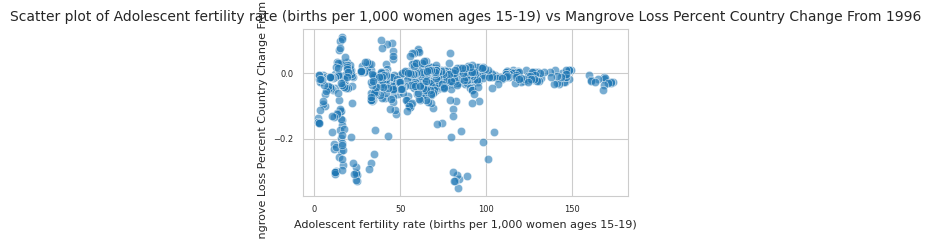

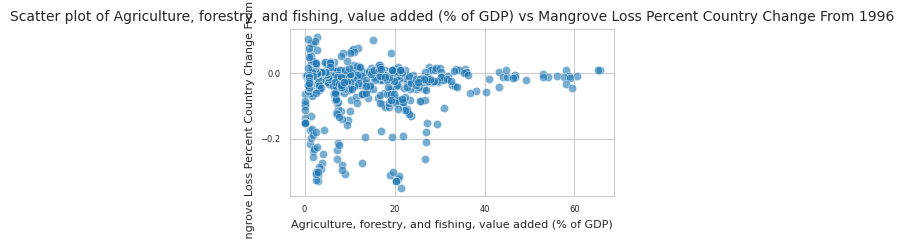

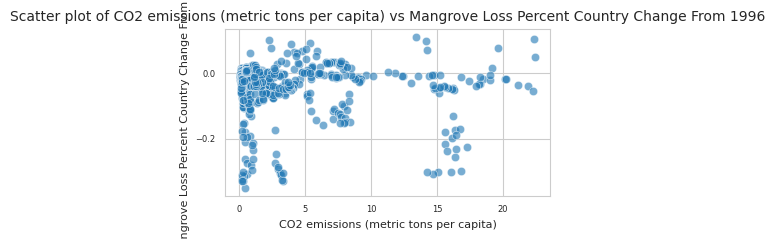

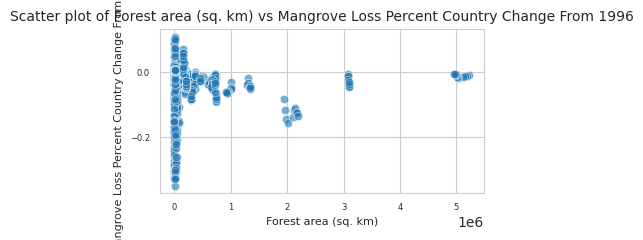

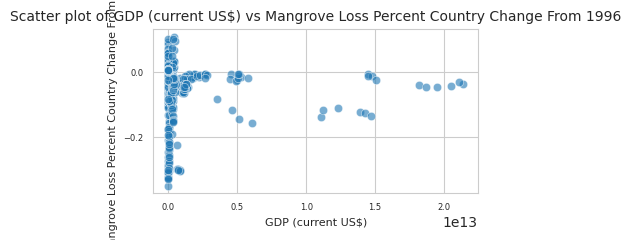

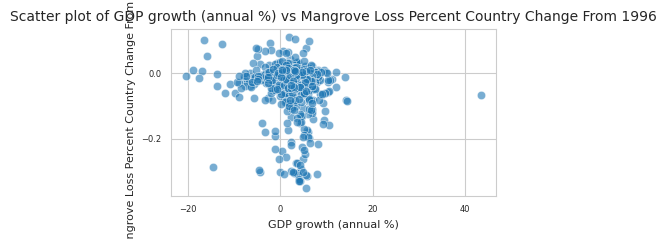

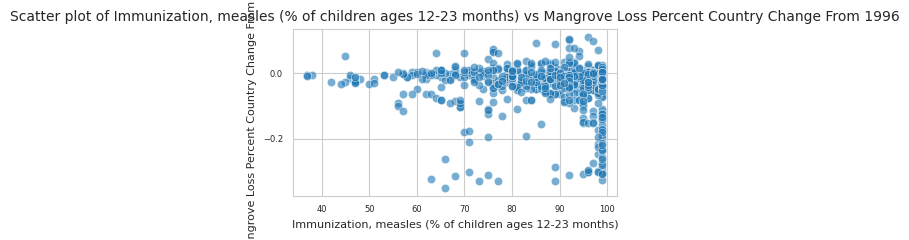

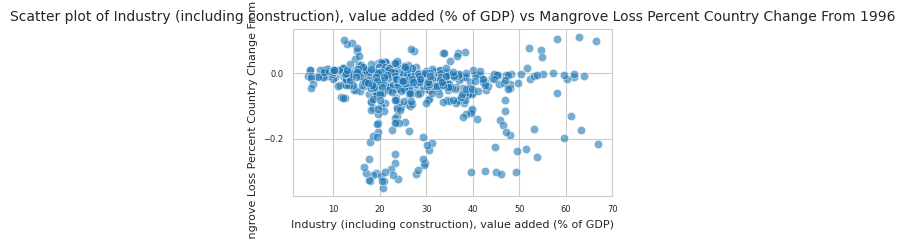

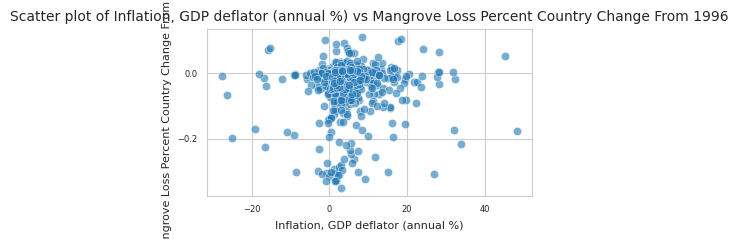

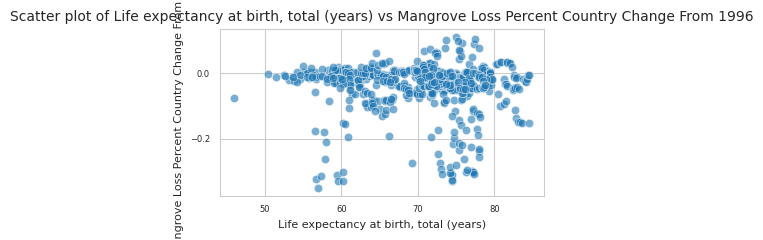

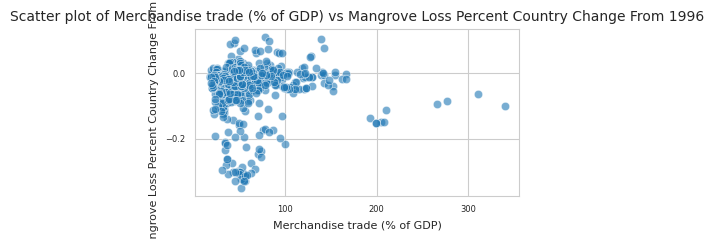

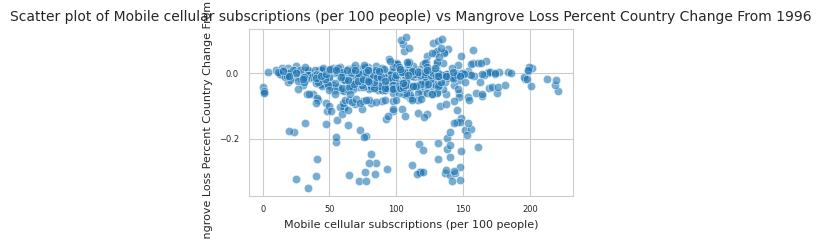

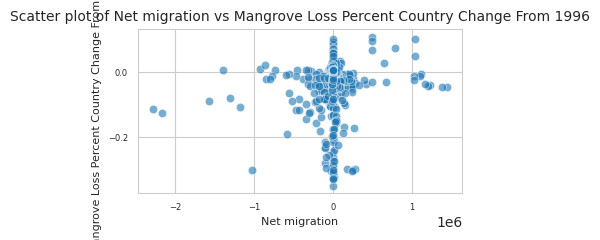

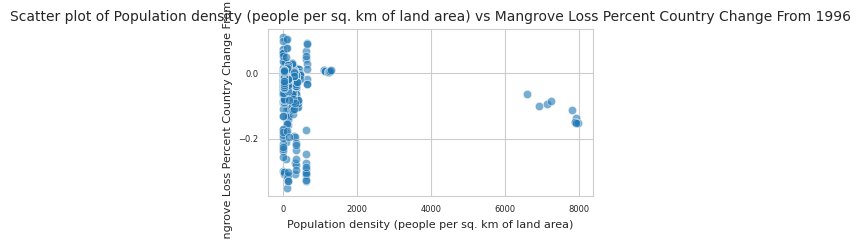

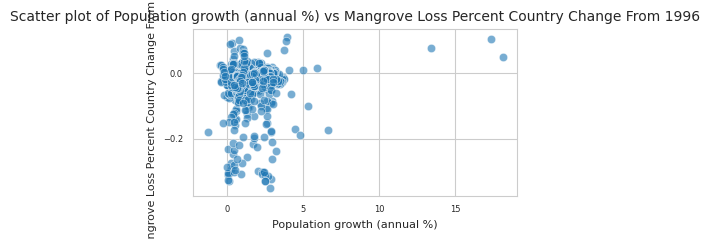

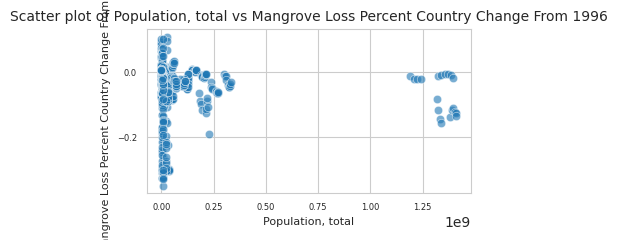

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of significant x variables from reduced_df
reduced_df_vars = list(reduced_df.columns)

outliers_removed_filtered_pivoted_master_df = filtered_pivoted_master_df.copy()
outliers_removed_filtered_pivoted_master_df = outliers_removed_filtered_pivoted_master_df[outliers_removed_filtered_pivoted_master_df['Area'] != 'Sudan']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create smaller scatter plots for each x variable against the y variable
for var in reduced_df_vars:
    plt.figure(figsize=(4, 2.5))  # Smaller figure size
    sns.scatterplot(data=outliers_removed_filtered_pivoted_master_df, x=var, y='Mangrove Loss Percent Country Change From 1996', alpha=0.6)
    plt.title(f'Scatter plot of {var} vs Mangrove Loss Percent Country Change From 1996', fontsize=10)
    plt.ylabel('Mangrove Loss Percent Country Change From 1996', fontsize=8)
    plt.xlabel(var, fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()  # Adjust layout to not cut off labels
    plt.show()

The outliers in some plots are hindering us to see the overall trends. Let's remove the outliers that does not relate to the overall trend:

In [68]:
outliers_removed_filtered_pivoted_master_df_copy = outliers_removed_filtered_pivoted_master_df.copy()
outliers_removed_filtered_pivoted_master_df_copy = outliers_removed_filtered_pivoted_master_df_copy[reduced_df_vars + ['Mangrove Loss Percent Country Change From 1996', 'Area']]

In [69]:
outliers_removed_filtered_pivoted_master_df_copy.head()

Variable,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),Forest area (sq. km),GDP (current US$),GDP growth (annual %),"Immunization, measles (% of children ages 12-23 months)","Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),Net migration,Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Mangrove Loss Percent Country Change From 1996,Area
10,168.678,5.242278,0.811414,738231.83,6.526642e+10,14.010000,58.0,61.883538,4.308432,53.642,88.953866,23.728412,73940.0,16.772025,3.639589,20909684.0,-0.011747,Angola
11,168.701,4.805339,0.888610,732681.22,8.853866e+10,11.170000,48.0,60.254820,19.365774,54.633,95.885792,31.225822,73804.0,17.399151,3.670909,21691522.0,-0.016882,Angola
12,169.586,6.621197,0.939457,727130.61,7.030720e+10,0.860000,46.0,44.056374,-16.762140,55.752,90.300856,36.029583,77265.0,18.053801,3.693482,22507674.0,-0.015821,Angola
13,164.955,6.180293,0.975917,721580.00,8.379947e+10,4.398376,62.0,52.368438,32.270469,56.726,80.265421,40.246921,90016.0,18.740824,3.734798,23364185.0,-0.016643,Angola
14,148.074,9.122534,1.125185,693826.90,9.049642e+10,0.943572,51.0,41.933092,-3.518385,60.655,59.531636,49.362449,74170.0,22.561740,3.617678,28127721.0,-0.018458,Angola


Now let's try removing the features that have higher p-values in the previous OLS result than a threshold we set and see if that improves the performance of our model. Let's save the features remaining as significant_vars:

In [70]:
p_values = model.pvalues

# Set the threshold for p-values
p_value_threshold = 0.25

# Get the list of variables that have a p-value less than the threshold
significant_vars = list(p_values[p_values < p_value_threshold].index)

# Exclude the constant term if it's in the list
if 'const' in significant_vars:
    significant_vars.remove('const')

# Select only significant variables for the new model
X_train_significant = X_train_const[significant_vars]

# Add a constant term for the new subset
X_train_significant_const = sm.add_constant(X_train_significant)

# Fit the regression model using only significant variables
model_refined = sm.OLS(y_train, X_train_significant_const).fit()

# Print out the summary statistics of the new model
print(model_refined.summary())

                                          OLS Regression Results                                          
Dep. Variable:     Mangrove Loss Percent Country Change From 1996   R-squared:                       0.212
Model:                                                        OLS   Adj. R-squared:                  0.195
Method:                                             Least Squares   F-statistic:                     12.43
Date:                                            Mon, 18 Mar 2024   Prob (F-statistic):           6.63e-21
Time:                                                    00:44:06   Log-Likelihood:                 467.98
No. Observations:                                             520   AIC:                            -912.0
Df Residuals:                                                 508   BIC:                            -860.9
Df Model:                                                      11                                         
Covariance Type:                     

In [71]:
significant_vars

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'GDP (current US$)',
 'Immunization, measles (% of children ages 12-23 months)',
 'Industry (including construction), value added (% of GDP)',
 'Inflation, GDP deflator (annual %)',
 'Life expectancy at birth, total (years)',
 'Merchandise trade (% of GDP)',
 'Net migration',
 'Population density (people per sq. km of land area)',
 'Population, total']

The result suggests that we are not having a good set of feature for prediction. It means that:
1. Better feature selection might be needed;
2. OLS might not be a good fit for our data;
3. We might need to consider other techniques, such as decision tree, that train models for different set of countries and features.

Let's further visualize the relationship between the predictor and the remaining features:

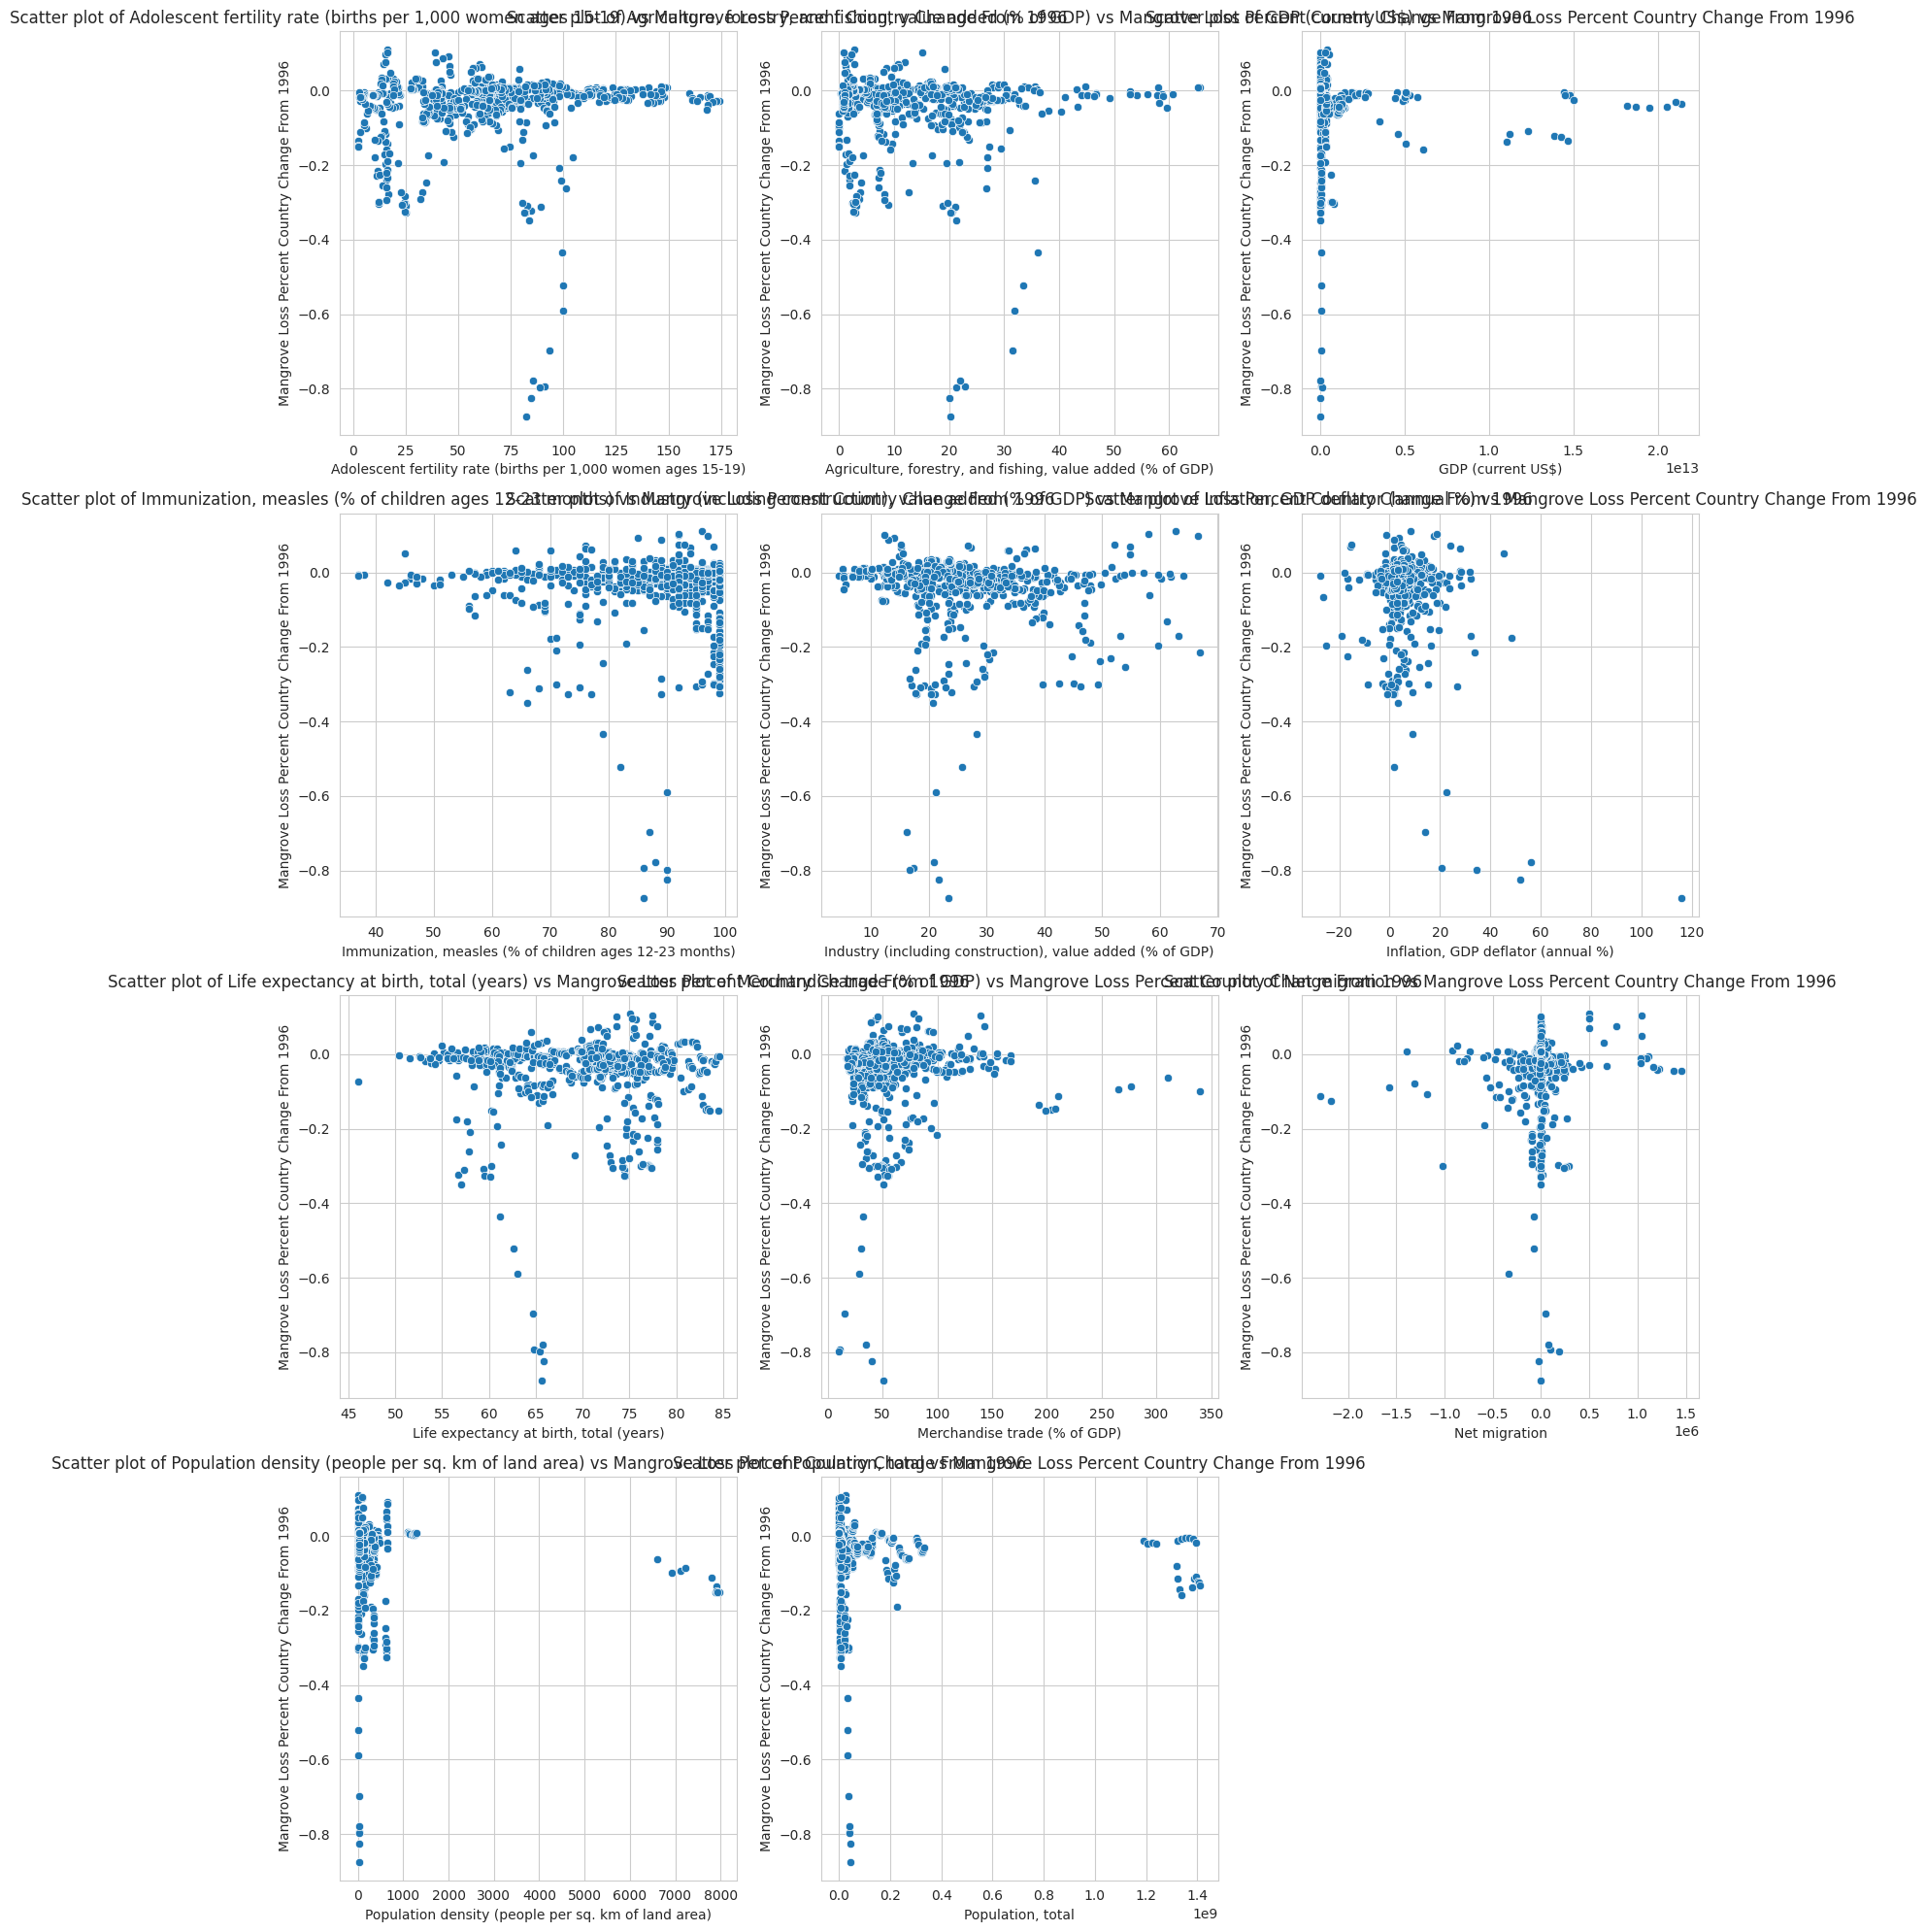

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

x_vars = significant_vars
y_var = 'Mangrove Loss Percent Country Change From 1996'

# Set the number of plots based on the number of x variables, arranged in a grid
n_cols = 3  # Adjust the number of columns per row in the grid
n_rows = int(np.ceil(len(x_vars) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, x_var in enumerate(x_vars):
    sns.scatterplot(data=filtered_pivoted_master_df, x=x_var, y=y_var, ax=axes[i])
    axes[i].set_title(f'Scatter plot of {x_var} vs {y_var}')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [81]:
# Create a new DataFrame for inspection that includes only significant variables and the 'Area' column
inspect_df = filtered_pivoted_master_df[significant_vars + ['Area', 'Mangrove Loss Percent Country Change From 1996']]

# Filter the DataFrame where Mangrove Loss is less than -0.4
outlier_inspect = inspect_df[inspect_df['Mangrove Loss Percent Country Change From 1996'] < -0.4]

# Check if these outliers are from the same country or multiple countries
outlier_countries = outlier_inspect['Area'].value_counts()

print(outlier_countries)

Sudan    9
Name: Area, dtype: int64


In [82]:
high_density = inspect_df[inspect_df['Population density (people per sq. km of land area)'] > 2000]

# Displaying the 'Area' column of the filtered DataFrame to check which countries have high population density
high_density_countries = high_density['Area'].value_counts()
print(high_density_countries)

Singapore    10
Name: Area, dtype: int64


By further inspecting, we found that most of the outliers are related to the data of specific countries. since we want to have a better understanding of our overall trends, we decided that removing these countries would not have a great influence on our data given our research focus:

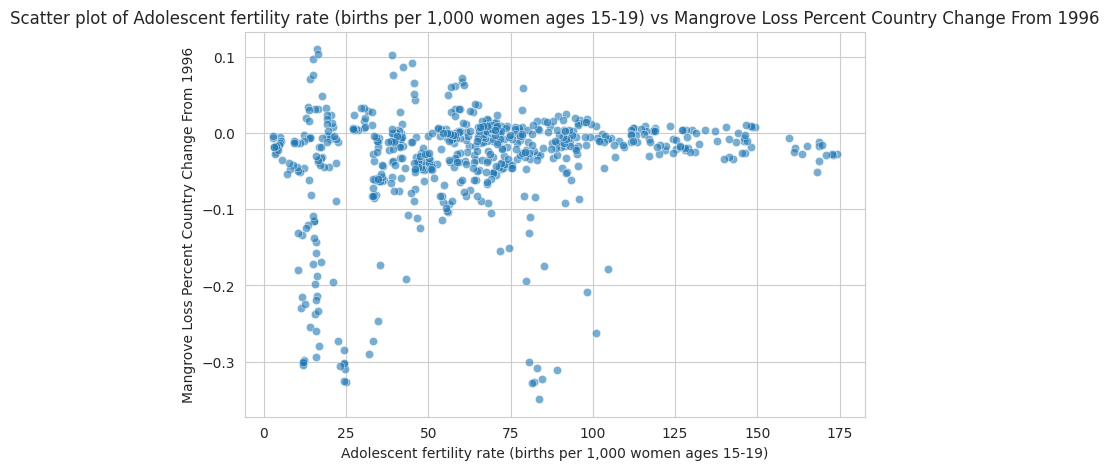

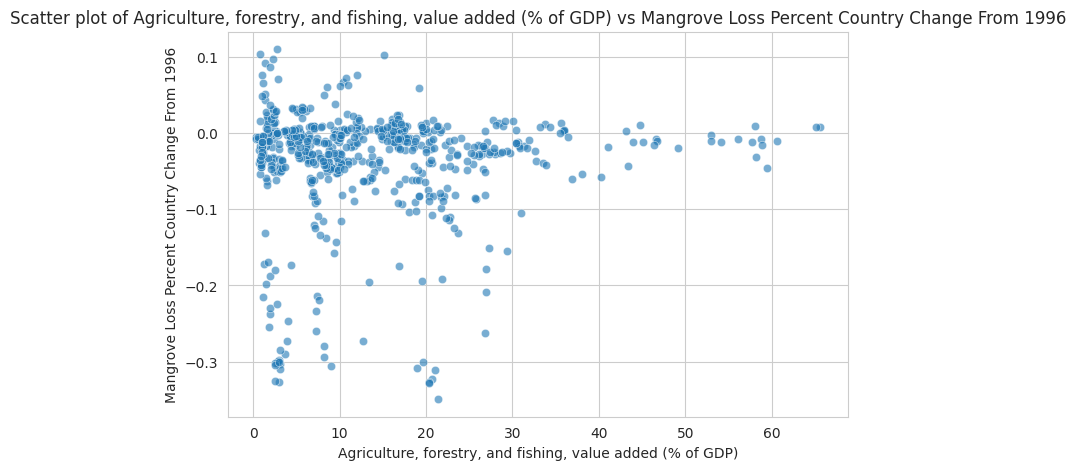

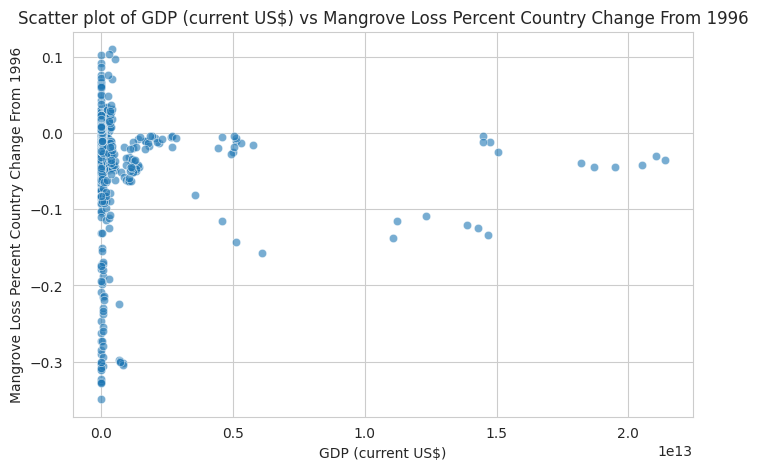

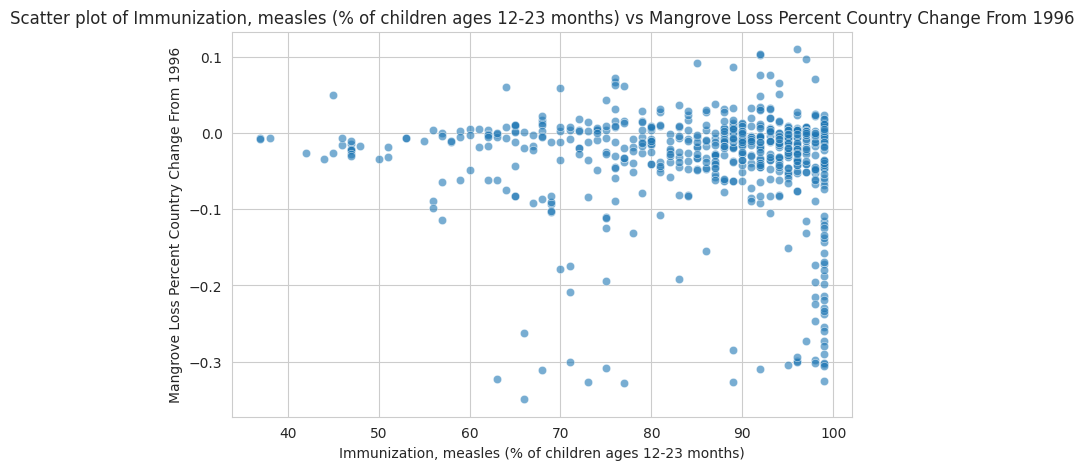

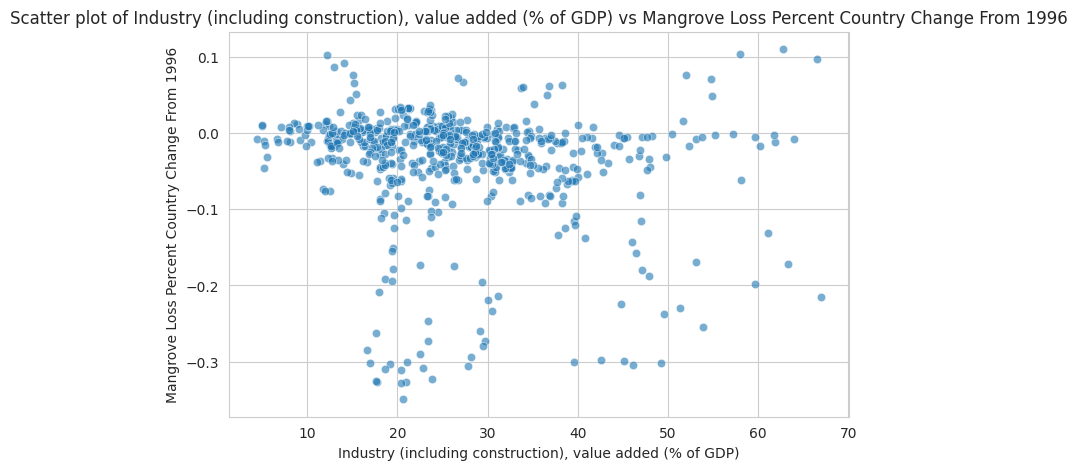

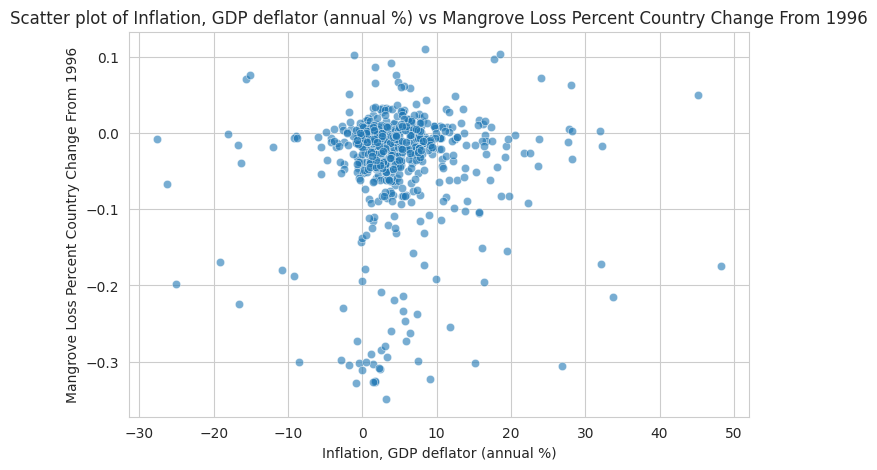

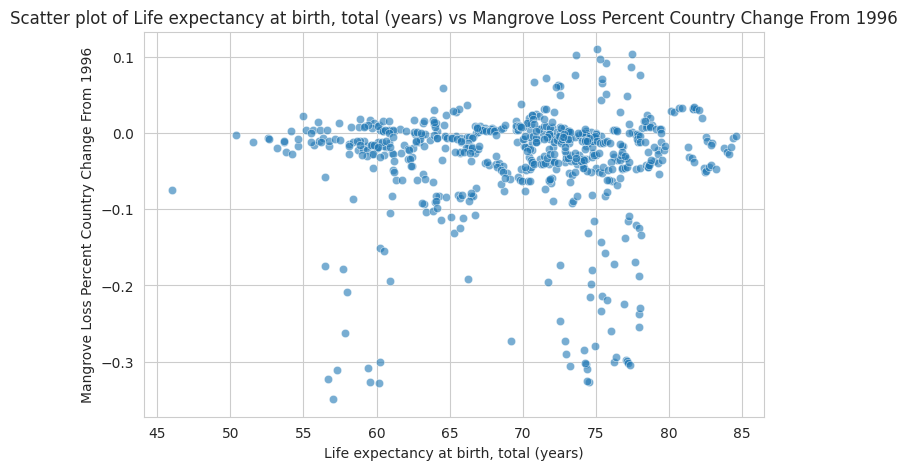

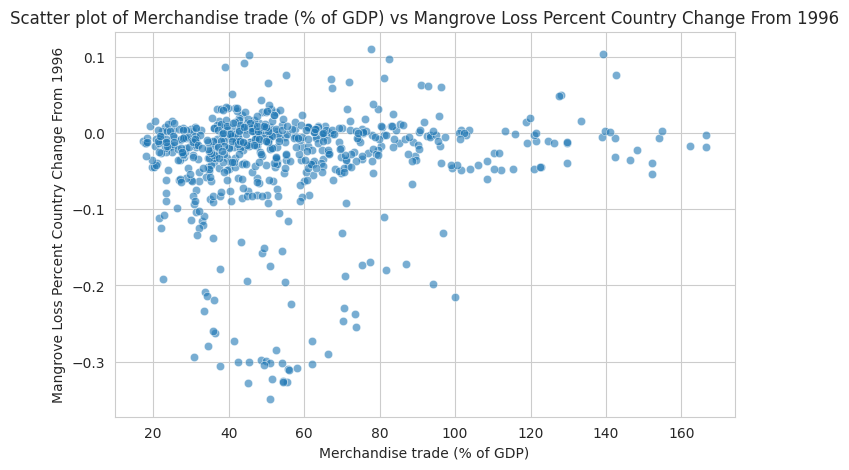

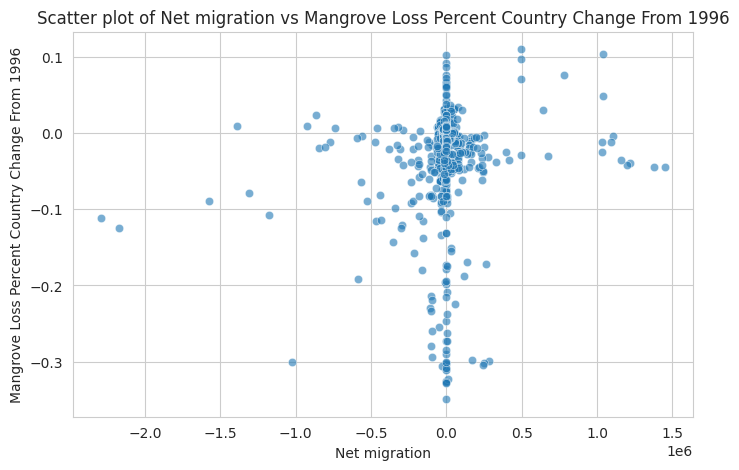

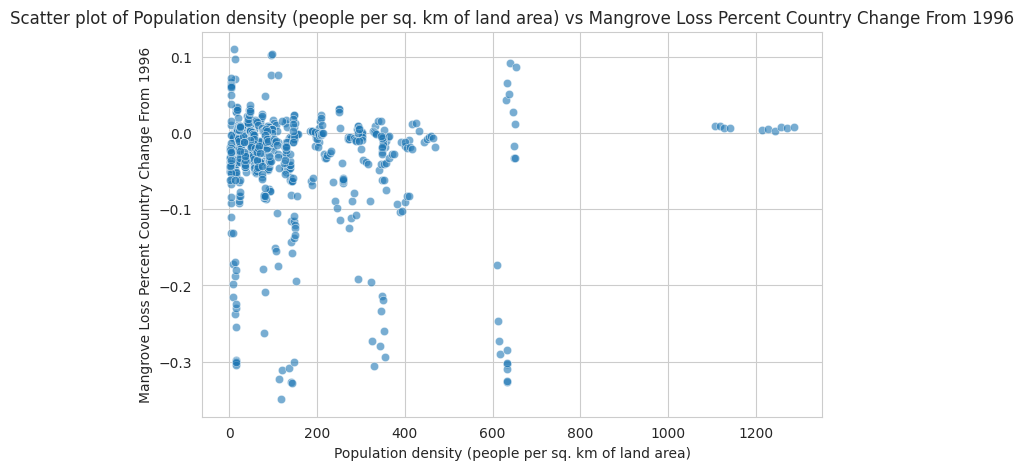

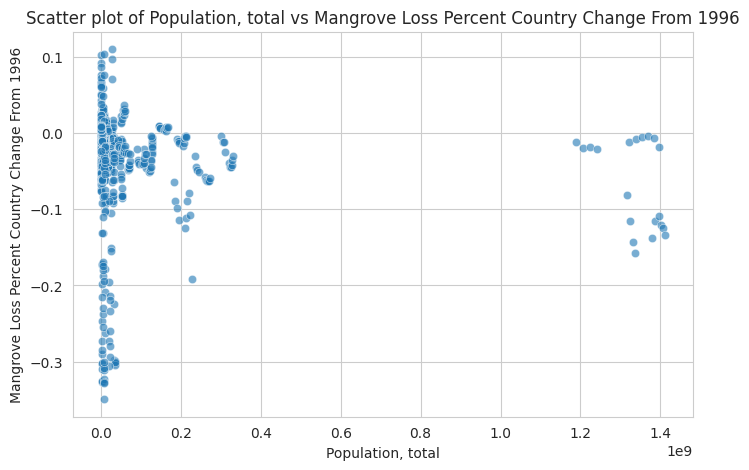

In [83]:
# Create a copy of inspect_df excluding the identified outlier country
outlier_cleaned_df = inspect_df[inspect_df['Area'] != 'Sudan']
outlier_cleaned_df = outlier_cleaned_df[outlier_cleaned_df['Area'] != 'Singapore']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create scatter plots
for var in significant_vars:
    if var != 'Area' and var != 'Mangrove Loss Percent Country Change From 1996':  # Exclude non-numeric columns
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=outlier_cleaned_df, x=var, y='Mangrove Loss Percent Country Change From 1996', alpha=0.6)
        plt.title(f'Scatter plot of {var} vs Mangrove Loss Percent Country Change From 1996')
        plt.ylabel('Mangrove Loss Percent Country Change From 1996')
        plt.xlabel(var)
        plt.show()

Let's run OLS again after removing the data of the countries/areas that are strongly related to the outliers:

In [84]:
X = outlier_cleaned_df[significant_vars]
y = outlier_cleaned_df['Mangrove Loss Percent Country Change From 1996']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

                                          OLS Regression Results                                          
Dep. Variable:     Mangrove Loss Percent Country Change From 1996   R-squared:                       0.156
Model:                                                        OLS   Adj. R-squared:                  0.137
Method:                                             Least Squares   F-statistic:                     8.271
Date:                                            Mon, 18 Mar 2024   Prob (F-statistic):           2.23e-13
Time:                                                    00:58:44   Log-Likelihood:                 636.05
No. Observations:                                             504   AIC:                            -1248.
Df Residuals:                                                 492   BIC:                            -1197.
Df Model:                                                      11                                         
Covariance Type:                     

In [85]:
outlier_cleaned_df.to_csv('/content/drive/My Drive/IBM_Spring24/Factor Research/Transformed Data/worldwide_feature_selected_mangrove_df.csv', index=False)

## Fixed Effects Model

Since we did not get a very good model performance using simple OLS, let's explore other options. First, let's try fitting a fixed effects model, which uses one-hot encoding to have a dummy variable column for each country:

In [73]:
Mangrove_by_country_for_FE = pd.read_excel('/content/drive/My Drive/IBM_Spring24/Factor Research/Collected Data/gmw_v3_country_statistics_ha.xlsx', sheet_name='(%) Country Change From 1996')
print(Mangrove_by_country_for_FE.shape)
Mangrove_by_country_for_FE.head()

(125, 12)


,C_ID,Name,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020
0,ABW,Aruba,-0.124582,-0.199713,-0.223008,-0.219329,-0.193405,-0.188766,-0.188766,-0.234624,-0.245901,-0.206250
1,AGO,Angola,-0.011747,-0.016882,-0.015821,-0.016643,-0.018458,-0.026758,-0.026546,-0.033867,-0.031261,-0.034054
2,AIA,Anguilla,-0.219696,-0.321891,-0.292101,-0.089057,0.107394,0.070885,0.032198,-0.089078,-0.171946,-0.160104
3,ARE,United Arab Emirates,0.048936,0.103596,0.075537,0.015019,-0.040036,-0.053395,-0.035717,-0.021875,-0.017115,-0.018510
4,ASM,American Samoa,-0.004212,-0.008459,-0.014159,-0.012815,-0.005687,-0.005647,-0.005647,-0.005647,-0.009883,-0.017014


In [74]:
filtered_pivoted_master_df_for_FE = filtered_pivoted_master_df.copy()
print(filtered_pivoted_master_df_for_FE.shape)
filtered_pivoted_master_df_for_FE.head()

(650, 26)


Variable,Area,Year,Mangrove Loss Percent Country Change From 1996,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),...,"Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km),Urban population growth (annual %)
10,Angola,2007,-0.011747,168.678,5.242278,0.811414,6.372,-8.933422e+08,738231.83,6.526642e+10,...,53.642,88.953866,23.728412,147.1,73940.0,16.772025,3.639589,20909684.0,1246700.0,4.969583
11,Angola,2008,-0.016882,168.701,4.805339,0.888610,6.320,1.678971e+09,732681.22,8.853866e+10,...,54.633,95.885792,31.225822,137.5,73804.0,17.399151,3.670909,21691522.0,1246700.0,4.980012
12,Angola,2009,-0.015821,169.586,6.621197,0.939457,6.260,2.205298e+09,727130.61,7.030720e+10,...,55.752,90.300856,36.029583,128.5,77265.0,18.053801,3.693482,22507674.0,1246700.0,4.975504
13,Angola,2010,-0.016643,164.955,6.180293,0.975917,6.194,-3.227211e+09,721580.00,8.379947e+10,...,56.726,80.265421,40.246921,120.0,90016.0,18.740824,3.734798,23364185.0,1246700.0,4.995581
14,Angola,2015,-0.018458,148.074,9.122534,1.125185,5.774,1.002822e+10,693826.90,9.049642e+10,...,60.655,59.531636,49.362449,88.3,74170.0,22.561740,3.617678,28127721.0,1246700.0,4.751019


In [75]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Convert 'Area' to categorical and create dummy variables
dummies = pd.get_dummies(filtered_pivoted_master_df_for_FE['Area'], drop_first=True)
df_with_dummies = pd.concat([filtered_pivoted_master_df_for_FE, dummies], axis=1)

# Drop the original 'Area' column
df_with_dummies.drop('Area', axis=1, inplace=True)

# Define the dependent and independent variables
X = df_with_dummies.drop(['Mangrove Loss Percent Country Change From 1996'], axis=1)
y = df_with_dummies['Mangrove Loss Percent Country Change From 1996']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all columns used in the model are numeric
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Add a constant to the numeric columns for the intercept
X_train_const = sm.add_constant(X_train_numeric)
X_test_const = sm.add_constant(X_test_numeric)

# Fit the OLS model with the numeric columns only
model = sm.OLS(y_train, X_train_const).fit()

# Make predictions on the test set
y_pred = model.predict(X_test_const)
print(model.summary())

                                          OLS Regression Results                                          
Dep. Variable:     Mangrove Loss Percent Country Change From 1996   R-squared:                       0.898
Model:                                                        OLS   Adj. R-squared:                  0.882
Method:                                             Least Squares   F-statistic:                     55.80
Date:                                            Mon, 18 Mar 2024   Prob (F-statistic):          8.03e-182
Time:                                                    00:50:11   Log-Likelihood:                 1000.6
No. Observations:                                             520   AIC:                            -1857.
Df Residuals:                                                 448   BIC:                            -1551.
Df Model:                                                      71                                         
Covariance Type:                     

This time, we get a high Adjusted $R^2$. Let's test its performance with out-of-sample data:

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared - This is usually sufficient for test set evaluation
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 0.0021253672796681146
Root Mean Squared Error (RMSE): 0.046101705821673396
Mean Absolute Error (MAE): 0.023050005131913465
R-squared: 0.7794356961862174


The MSE looks reasonable and the out-of-sample $R^2$ again indicates that it might be a great model. Therefore, let's go some steps further with the data we further cleaned up after removing outliers and selecting features to see if we can get better models based on those data:

Let's try using the data after our first time of feature selection (removing variables with high VIFs and ensure all VIFs under a threshold) to fit the fixed-effects model to see if it yields better model performances:

In [77]:
outliers_removed_filtered_pivoted_master_df_copy.head()

Variable,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",CO2 emissions (metric tons per capita),Forest area (sq. km),GDP (current US$),GDP growth (annual %),"Immunization, measles (% of children ages 12-23 months)","Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Mobile cellular subscriptions (per 100 people),Net migration,Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Mangrove Loss Percent Country Change From 1996,Area
10,168.678,5.242278,0.811414,738231.83,6.526642e+10,14.010000,58.0,61.883538,4.308432,53.642,88.953866,23.728412,73940.0,16.772025,3.639589,20909684.0,-0.011747,Angola
11,168.701,4.805339,0.888610,732681.22,8.853866e+10,11.170000,48.0,60.254820,19.365774,54.633,95.885792,31.225822,73804.0,17.399151,3.670909,21691522.0,-0.016882,Angola
12,169.586,6.621197,0.939457,727130.61,7.030720e+10,0.860000,46.0,44.056374,-16.762140,55.752,90.300856,36.029583,77265.0,18.053801,3.693482,22507674.0,-0.015821,Angola
13,164.955,6.180293,0.975917,721580.00,8.379947e+10,4.398376,62.0,52.368438,32.270469,56.726,80.265421,40.246921,90016.0,18.740824,3.734798,23364185.0,-0.016643,Angola
14,148.074,9.122534,1.125185,693826.90,9.049642e+10,0.943572,51.0,41.933092,-3.518385,60.655,59.531636,49.362449,74170.0,22.561740,3.617678,28127721.0,-0.018458,Angola


In [78]:
# Convert 'Area' to categorical and create dummy variables
dummies = pd.get_dummies(outliers_removed_filtered_pivoted_master_df_copy['Area'], drop_first=True)
df_with_dummies = pd.concat([outliers_removed_filtered_pivoted_master_df_copy, dummies], axis=1)

# Drop the original 'Area' column
df_with_dummies.drop('Area', axis=1, inplace=True)

# Define the dependent and independent variables
X = df_with_dummies.drop(['Mangrove Loss Percent Country Change From 1996'], axis=1)
y = df_with_dummies['Mangrove Loss Percent Country Change From 1996']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all columns used in the model are numeric
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Add a constant to the numeric columns for the intercept
X_train_const = sm.add_constant(X_train_numeric)
X_test_const = sm.add_constant(X_test_numeric)

# Fit the OLS model with the numeric columns only
model = sm.OLS(y_train, X_train_const).fit()

y_pred = model.predict(X_test_const)
print(model.summary())

                                          OLS Regression Results                                          
Dep. Variable:     Mangrove Loss Percent Country Change From 1996   R-squared:                       0.795
Model:                                                        OLS   Adj. R-squared:                  0.763
Method:                                             Least Squares   F-statistic:                     24.44
Date:                                            Mon, 18 Mar 2024   Prob (F-statistic):          1.50e-113
Time:                                                    00:53:28   Log-Likelihood:                 1024.0
No. Observations:                                             512   AIC:                            -1906.
Df Residuals:                                                 441   BIC:                            -1605.
Df Model:                                                      70                                         
Covariance Type:                     

In [79]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared - This is usually sufficient for test set evaluation
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 0.0012328399393987165
Root Mean Squared Error (RMSE): 0.03511182050818095
Mean Absolute Error (MAE): 0.022352335041125288
R-squared: 0.8093153957889131


Let's then use the data with the further selected set of x variables after dropping those with high p-values and after the outliers removal to see if that can help us improve model performance by even more:

In [86]:
outlier_cleaned_df.head()

Variable,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",GDP (current US$),"Immunization, measles (% of children ages 12-23 months)","Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Net migration,Population density (people per sq. km of land area),"Population, total",Area,Mangrove Loss Percent Country Change From 1996
10,168.678,5.242278,6.526642e+10,58.0,61.883538,4.308432,53.642,88.953866,73940.0,16.772025,20909684.0,Angola,-0.011747
11,168.701,4.805339,8.853866e+10,48.0,60.254820,19.365774,54.633,95.885792,73804.0,17.399151,21691522.0,Angola,-0.016882
12,169.586,6.621197,7.030720e+10,46.0,44.056374,-16.762140,55.752,90.300856,77265.0,18.053801,22507674.0,Angola,-0.015821
13,164.955,6.180293,8.379947e+10,62.0,52.368438,32.270469,56.726,80.265421,90016.0,18.740824,23364185.0,Angola,-0.016643
14,148.074,9.122534,9.049642e+10,51.0,41.933092,-3.518385,60.655,59.531636,74170.0,22.561740,28127721.0,Angola,-0.018458


In [87]:
# Convert 'Area' to categorical and create dummy variables
dummies = pd.get_dummies(outlier_cleaned_df['Area'], drop_first=True)
df_with_dummies = pd.concat([outlier_cleaned_df, dummies], axis=1)

# Drop the original 'Area' column
df_with_dummies.drop('Area', axis=1, inplace=True)

# Define the dependent and independent variables
X = df_with_dummies.drop(['Mangrove Loss Percent Country Change From 1996'], axis=1)
y = df_with_dummies['Mangrove Loss Percent Country Change From 1996']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all columns used in the model are numeric
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Add a constant to the numeric columns for the intercept
X_train_const = sm.add_constant(X_train_numeric)
X_test_const = sm.add_constant(X_test_numeric)

# Fit the OLS model with the numeric columns only
model = sm.OLS(y_train, X_train_const).fit()

# Make predictions on the test set
y_pred = model.predict(X_test_const)

# Summary of the model
print(model.summary())

                                          OLS Regression Results                                          
Dep. Variable:     Mangrove Loss Percent Country Change From 1996   R-squared:                       0.783
Model:                                                        OLS   Adj. R-squared:                  0.750
Method:                                             Least Squares   F-statistic:                     23.88
Date:                                            Mon, 18 Mar 2024   Prob (F-statistic):          1.27e-108
Time:                                                    00:59:00   Log-Likelihood:                 978.24
No. Observations:                                             504   AIC:                            -1822.
Df Residuals:                                                 437   BIC:                            -1540.
Df Model:                                                      66                                         
Covariance Type:                     

In [88]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared - This is usually sufficient for test set evaluation
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 0.0009333557003499229
Root Mean Squared Error (RMSE): 0.030550870697083624
Mean Absolute Error (MAE): 0.0198156688455935
R-squared: 0.8164597930120951
